#### IMPORT LIBRARY

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.preprocessing.text import Tokenizer
from keras.regularizers import l2
import keras.backend as K
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
import copy
import keras

#### LOAD DATA

In [2]:
df_train = pd.read_csv('data_train.txt', sep=' ', header=None, names=['machine_id', 'time_in_cycle',
                                                                    'operational_setting_1', 'operational_setting_2',
                                                                    'operational_setting_3', 'sensor_measurement_1',
                                                                    'sensor_measurement_2', 'sensor_measurement_3',
                                                                    'sensor_measurement_4', 'sensor_measurement_5',
                                                                    'sensor_measurement_6', 'sensor_measurement_7',
                                                                    'sensor_measurement_8', 'sensor_measurement_9',
                                                                    'sensor_measurement_10', 'sensor_measurement_11',
                                                                    'sensor_measurement_12', 'sensor_measurement_13',
                                                                    'sensor_measurement_14', 'sensor_measurement_15',
                                                                    'sensor_measurement_16', 'sensor_measurement_17',
                                                                    'sensor_measurement_18', 'sensor_measurement_19',
                                                                    'sensor_measurement_20', 'sensor_measurement_21',
                                                                    'sensor_measurement_22', 'sensor_measurement_23',
                                                                    'sensor_measurement_24', 'sensor_measurement_25',
                                                                    'sensor_measurement_26'])
df_train.drop(columns=['sensor_measurement_22', 'sensor_measurement_23', 'sensor_measurement_24',
                                  'sensor_measurement_25', 'sensor_measurement_26'], inplace=True)
df_train['sensor_measurement_17'] = df_train['sensor_measurement_17'].astype(float)
df_train['sensor_measurement_18'] = df_train['sensor_measurement_18'].astype(float)
df_train

,machine_id,time_in_cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334.0,2223.0,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330.0,2212.0,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309.0,1915.0,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329.0,2212.0,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309.0,1915.0,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369.0,2324.0,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374.0,2319.0,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310.0,1915.0,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311.0,1915.0,84.93,14.05,8.3729


In [4]:
df_train.isna().sum()

machine_id               0
time_in_cycle            0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64

In [5]:
df_train.duplicated().sum()

0

#### DESCRIBE DATA

In [4]:
df_train.describe()

,machine_id,time_in_cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,131.082981,109.154746,23.998407,0.572056,94.046020,472.910207,579.672399,1419.971013,1205.442024,8.031986,...,266.069034,2334.557253,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423
std,74.463862,69.180569,14.747376,0.310016,14.237735,26.389707,37.289399,105.946341,119.123428,3.613839,...,137.659507,128.068271,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.530000,1243.730000,1023.770000,3.910000,...,129.120000,2027.610000,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500
25%,68.000000,52.000000,10.004600,0.250700,100.000000,445.000000,549.570000,1352.760000,1123.655000,3.910000,...,131.520000,2387.900000,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300
50%,131.000000,104.000000,25.001300,0.700000,100.000000,462.540000,555.980000,1369.180000,1138.890000,7.050000,...,183.200000,2388.080000,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200
75%,195.000000,157.000000,41.998000,0.840000,100.000000,491.190000,607.340000,1499.370000,1306.850000,10.520000,...,371.260000,2388.170000,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200
max,260.000000,378.000000,42.008000,0.842000,100.000000,518.670000,644.520000,1612.880000,1439.230000,14.620000,...,523.370000,2390.480000,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100


#### SHOW DATA DTYPES

In [3]:
df_train.dtypes

machine_id                 int64
time_in_cycle              int64
operational_setting_1    float64
operational_setting_2    float64
operational_setting_3    float64
sensor_measurement_1     float64
sensor_measurement_2     float64
sensor_measurement_3     float64
sensor_measurement_4     float64
sensor_measurement_5     float64
sensor_measurement_6     float64
sensor_measurement_7     float64
sensor_measurement_8     float64
sensor_measurement_9     float64
sensor_measurement_10    float64
sensor_measurement_11    float64
sensor_measurement_12    float64
sensor_measurement_13    float64
sensor_measurement_14    float64
sensor_measurement_15    float64
sensor_measurement_16    float64
sensor_measurement_17    float64
sensor_measurement_18    float64
sensor_measurement_19    float64
sensor_measurement_20    float64
sensor_measurement_21    float64
dtype: object

#### DATA CORRELATION

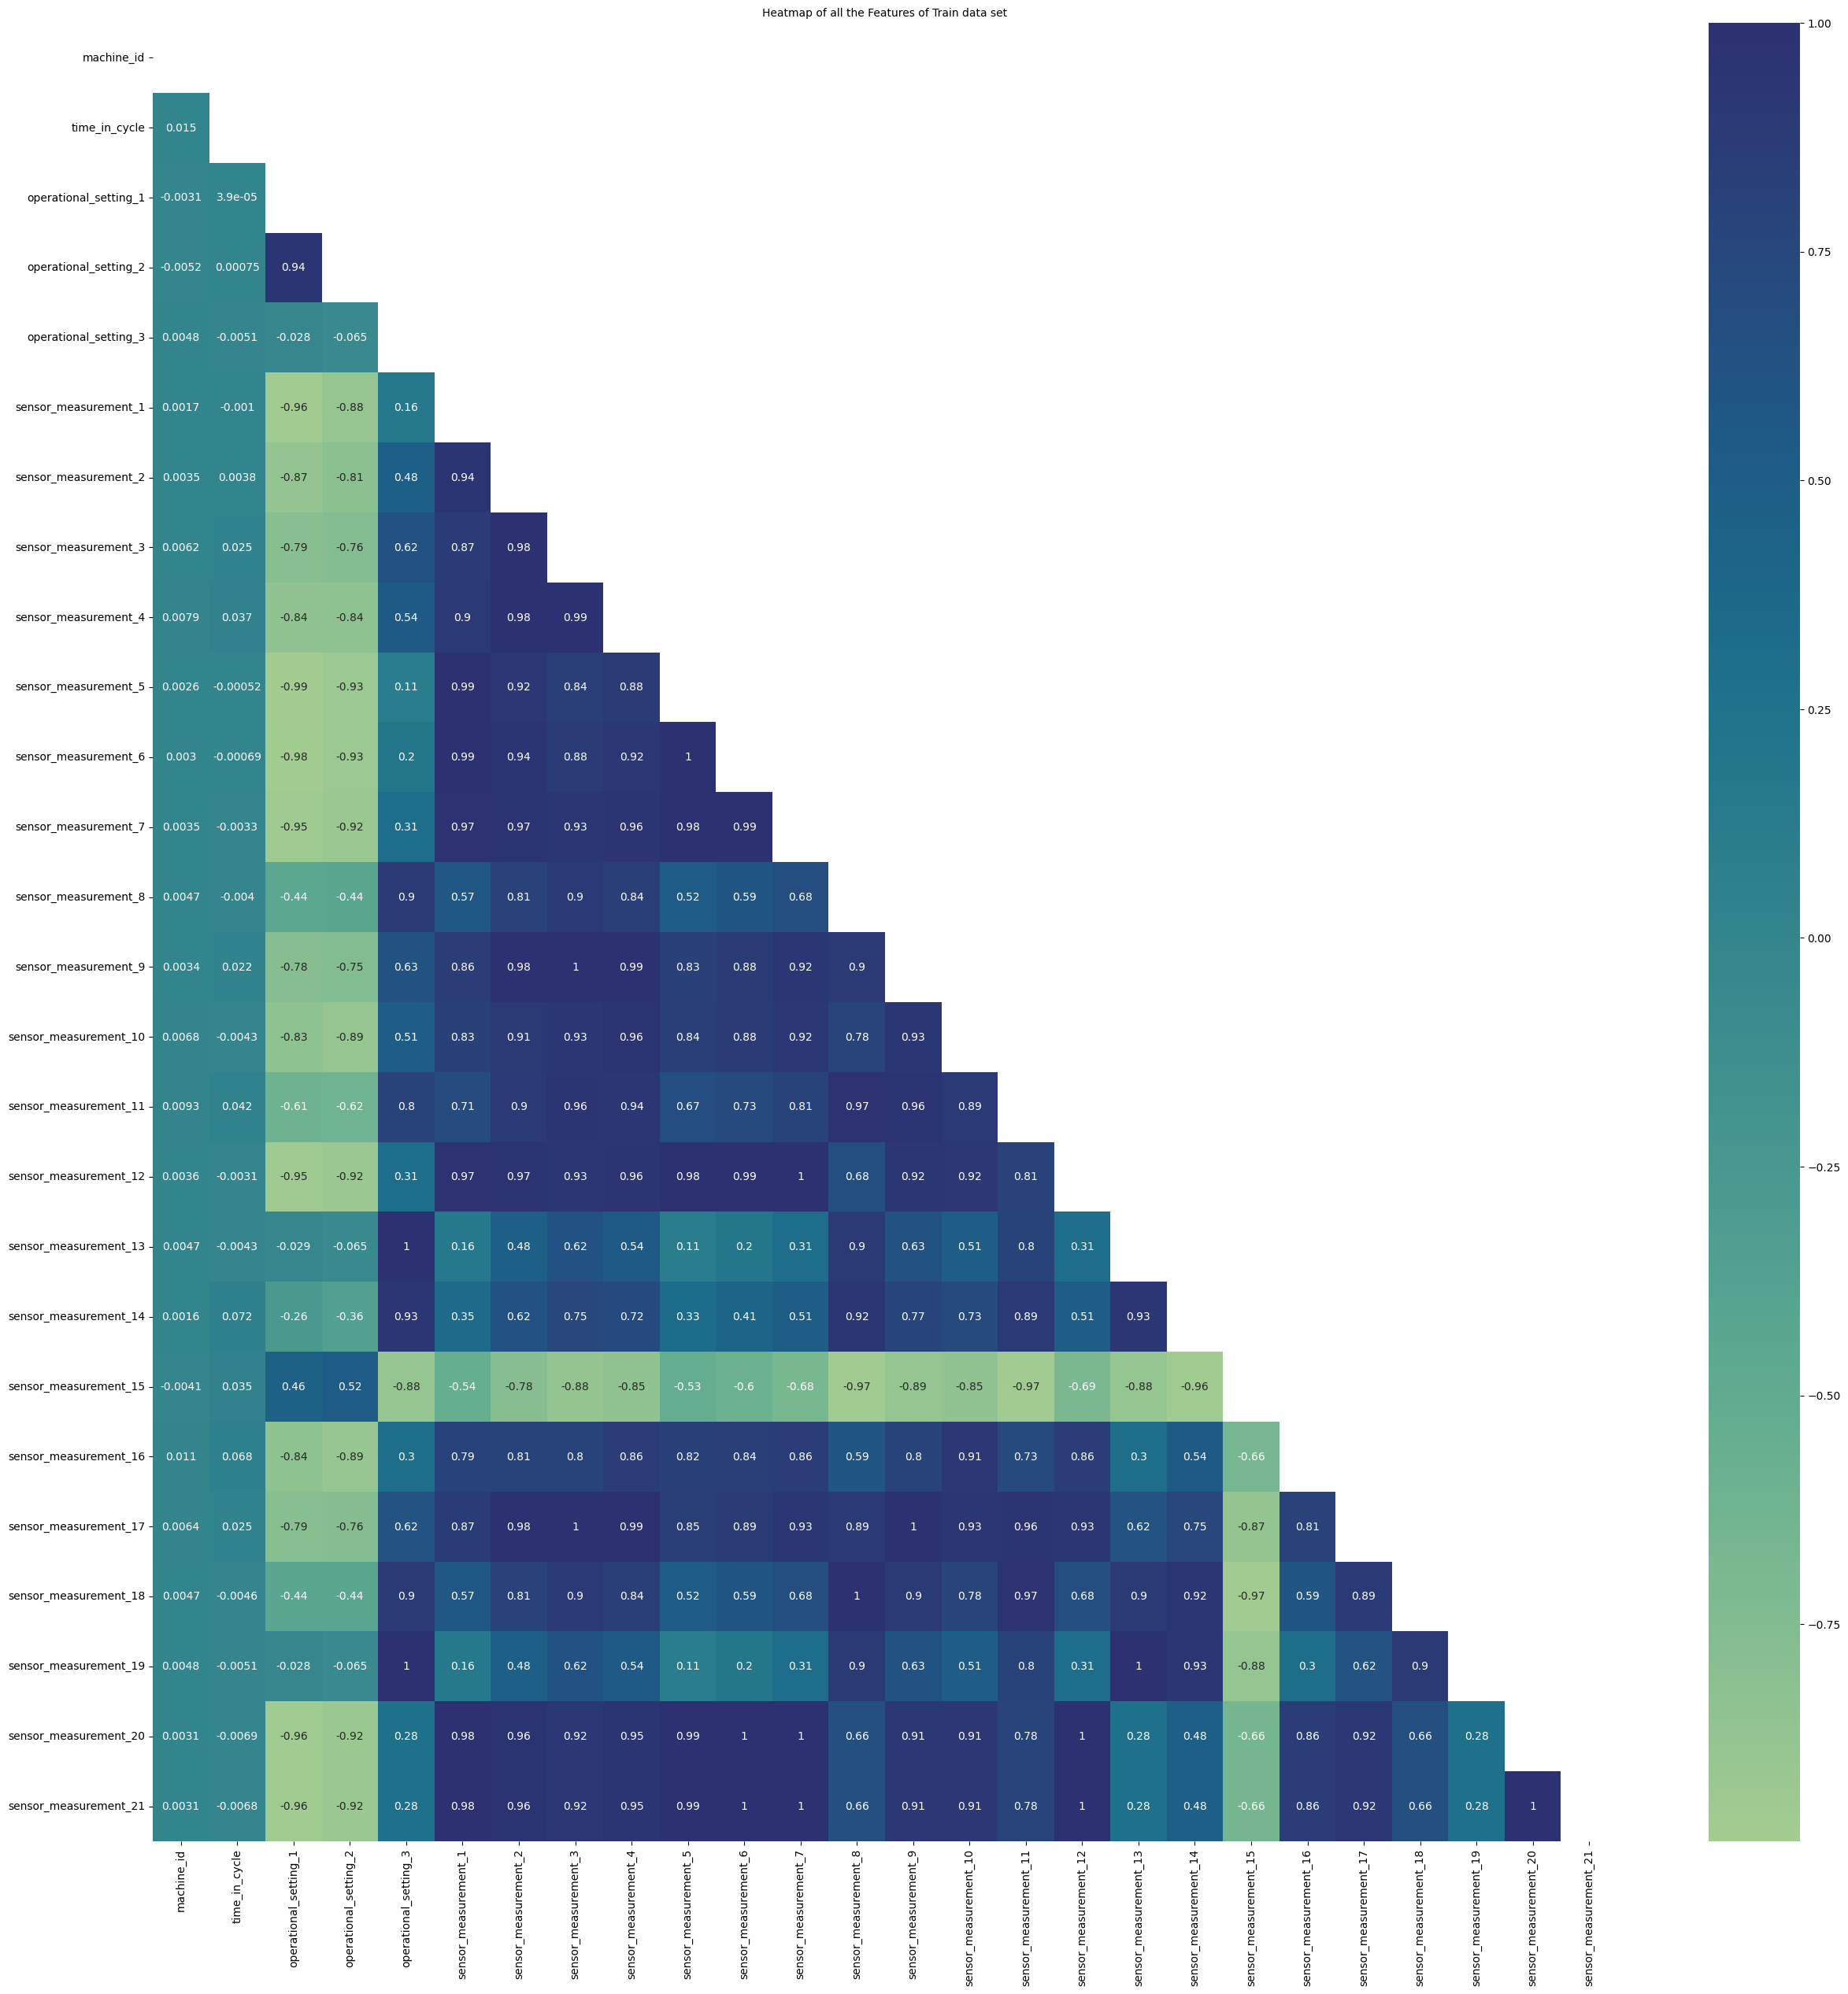

In [7]:
mask = np.zeros_like(df_train.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30, 30))
sns.heatmap(df_train.corr(), cmap="crest", annot=True, mask=mask, center=0, )
plt.title("Heatmap of all the Features of Train data set", fontsize=10)
#plt.yticks(rotation=45)
plt.show()

### Data Correlation Matrix shows that there are correlationship between all sensors and operational_settings, and sensor_measurement_15 has opposite relationship with others sensors. machine_id and time_in_cycle have no relationship to others parameters. operational_setting_1 and operational_setting_2 have opposite relationship to almost sensors.  

### Regarding above analysis, we need to bring all operational_setting and sensor_measurement into the important features for data training progress because all of it have correlation to predict time_in_cycle


#### DATA VISUALIZE

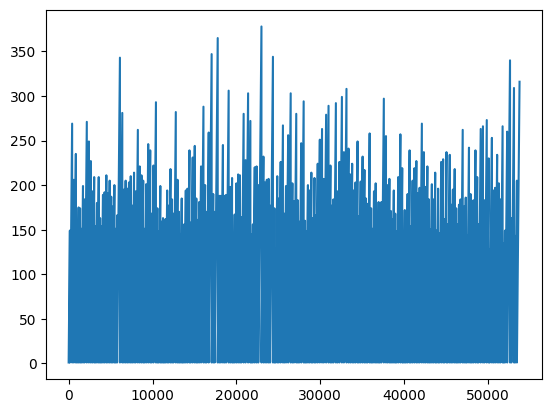

In [8]:
plt.plot(df_train['time_in_cycle'])

<Axes: >

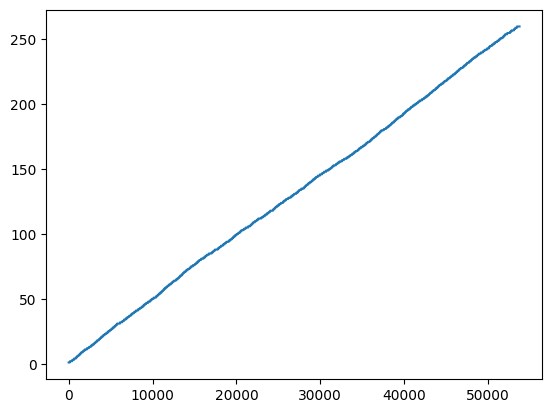

In [9]:
df_train['machine_id'].plot()

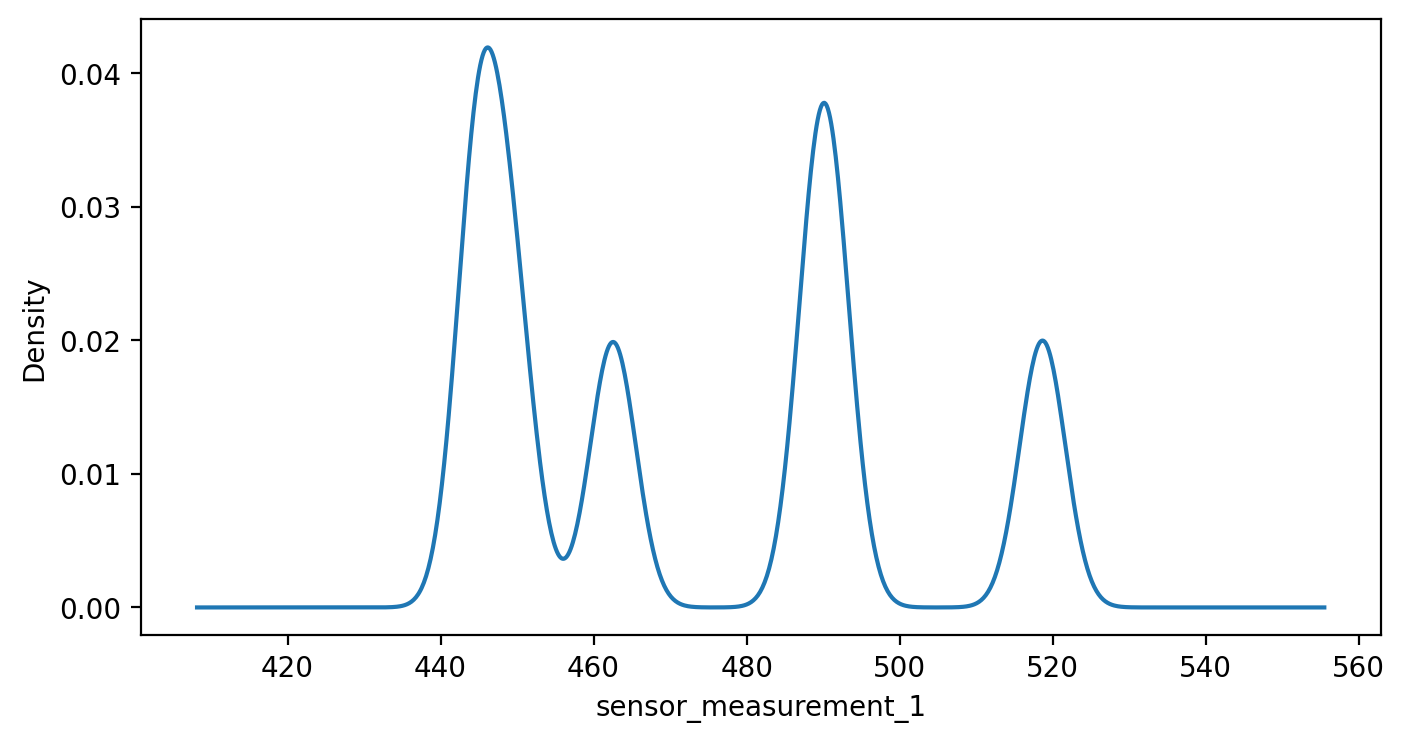

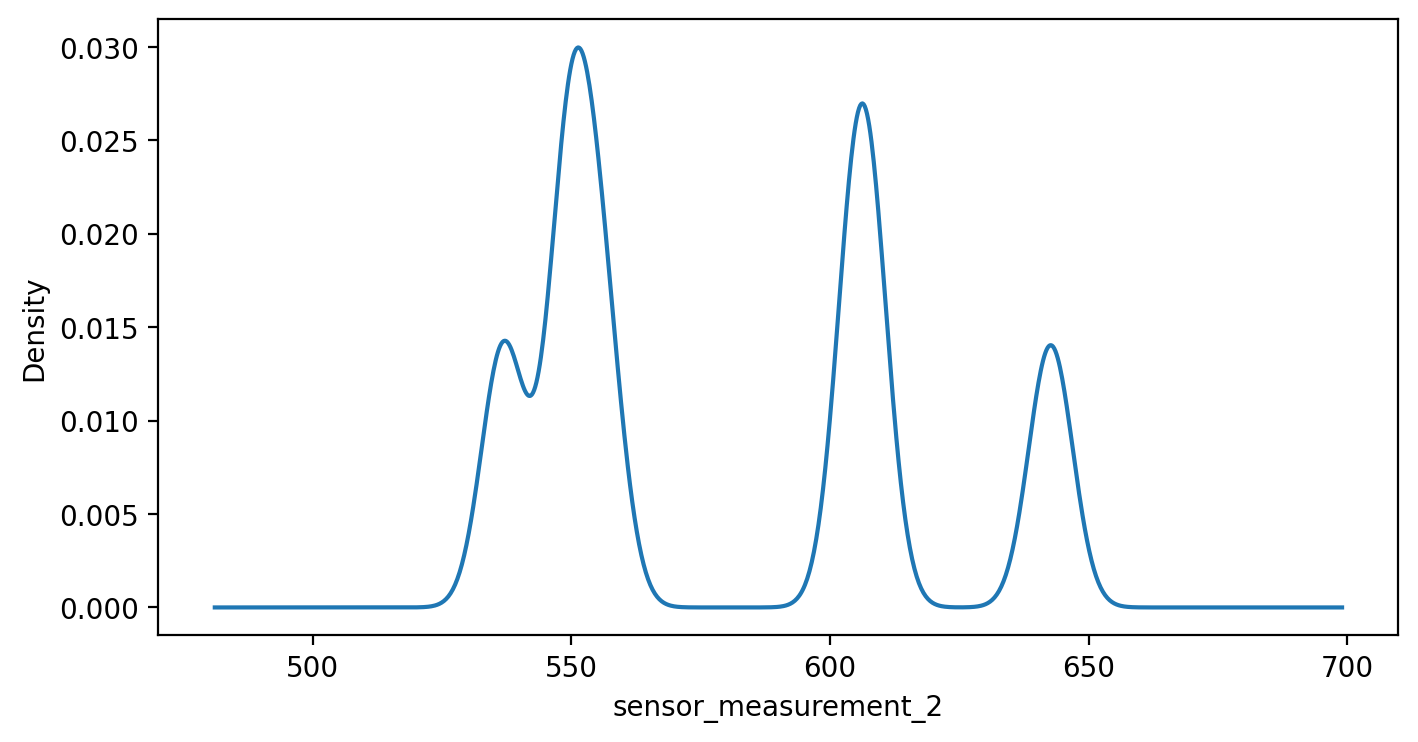

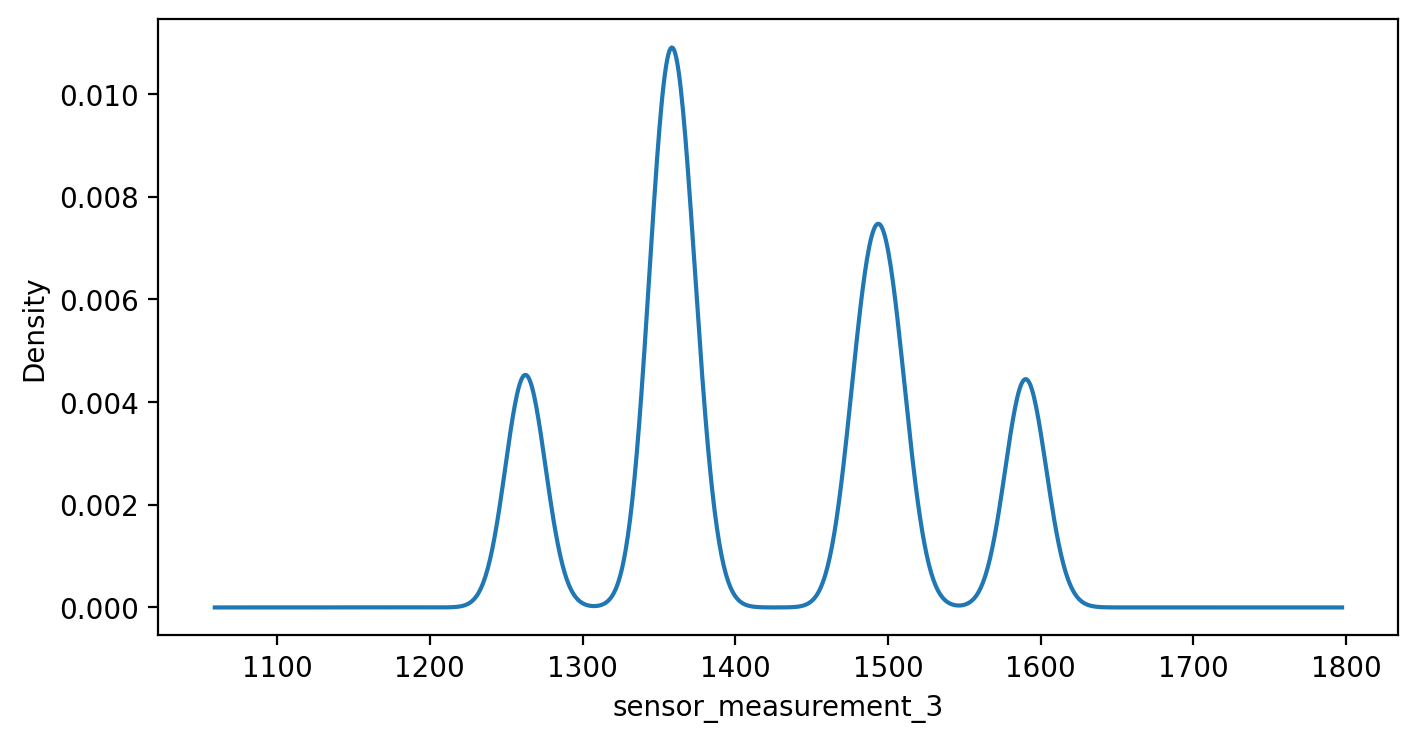

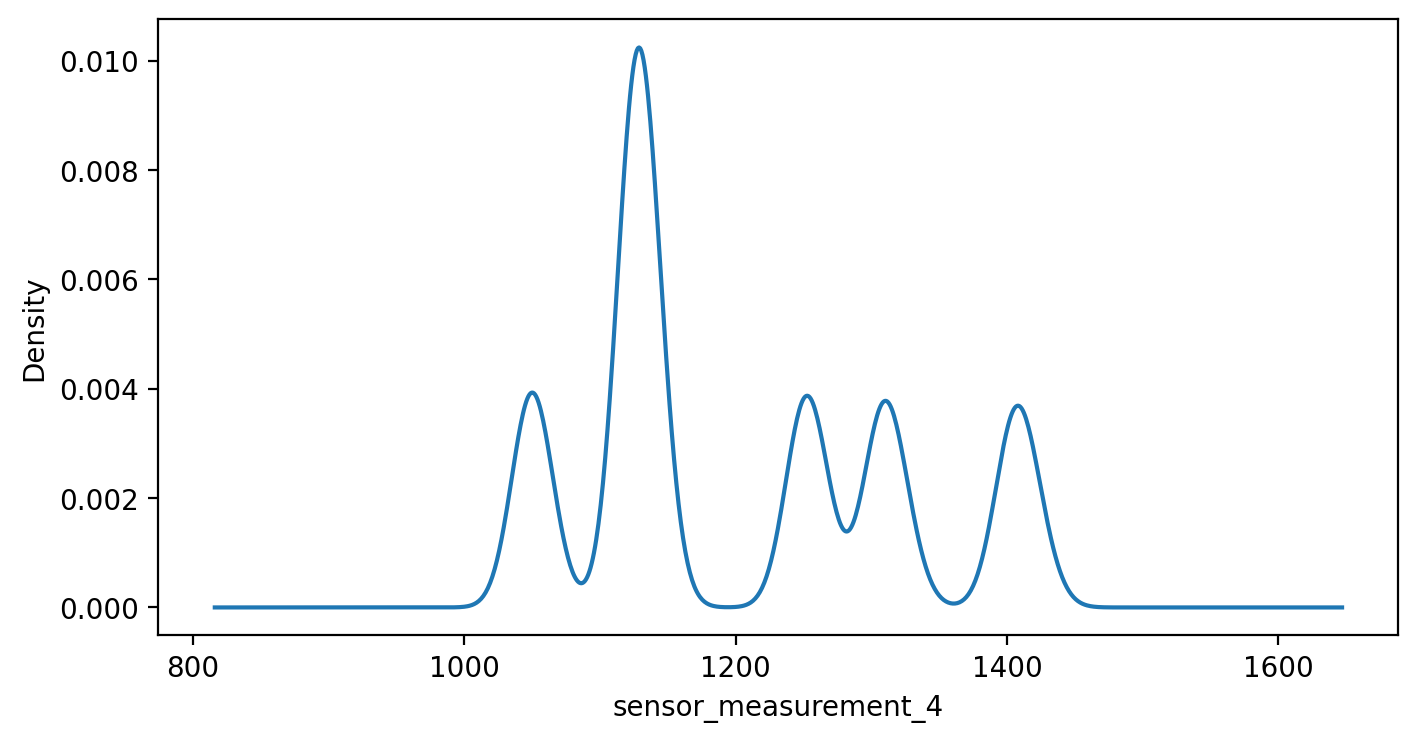

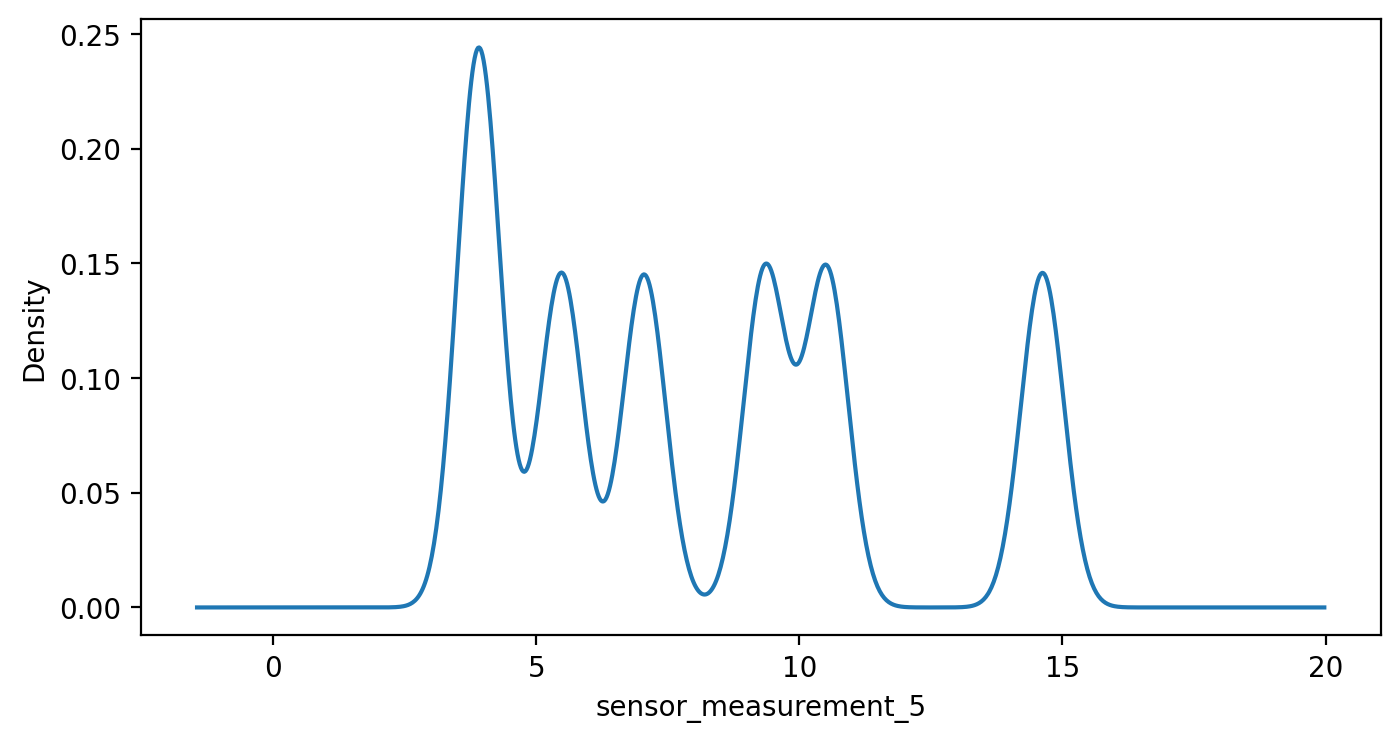

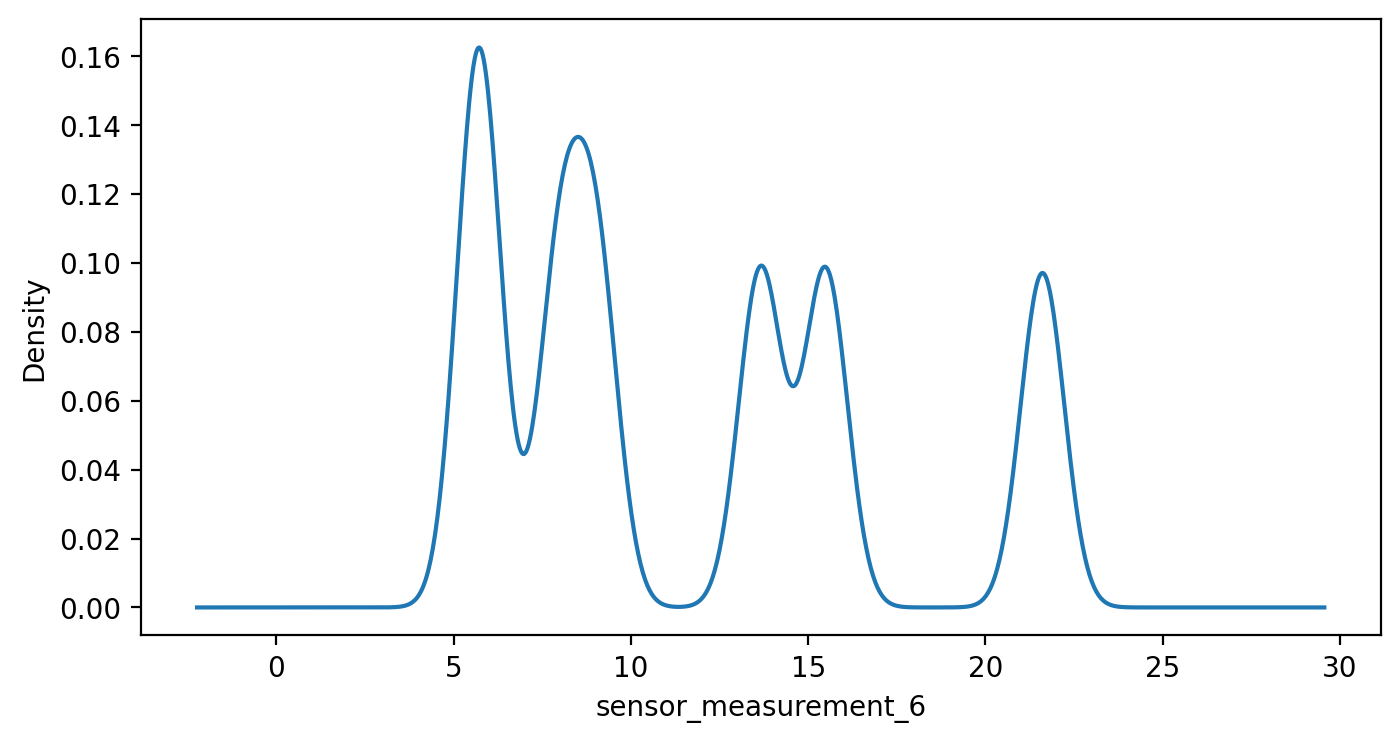

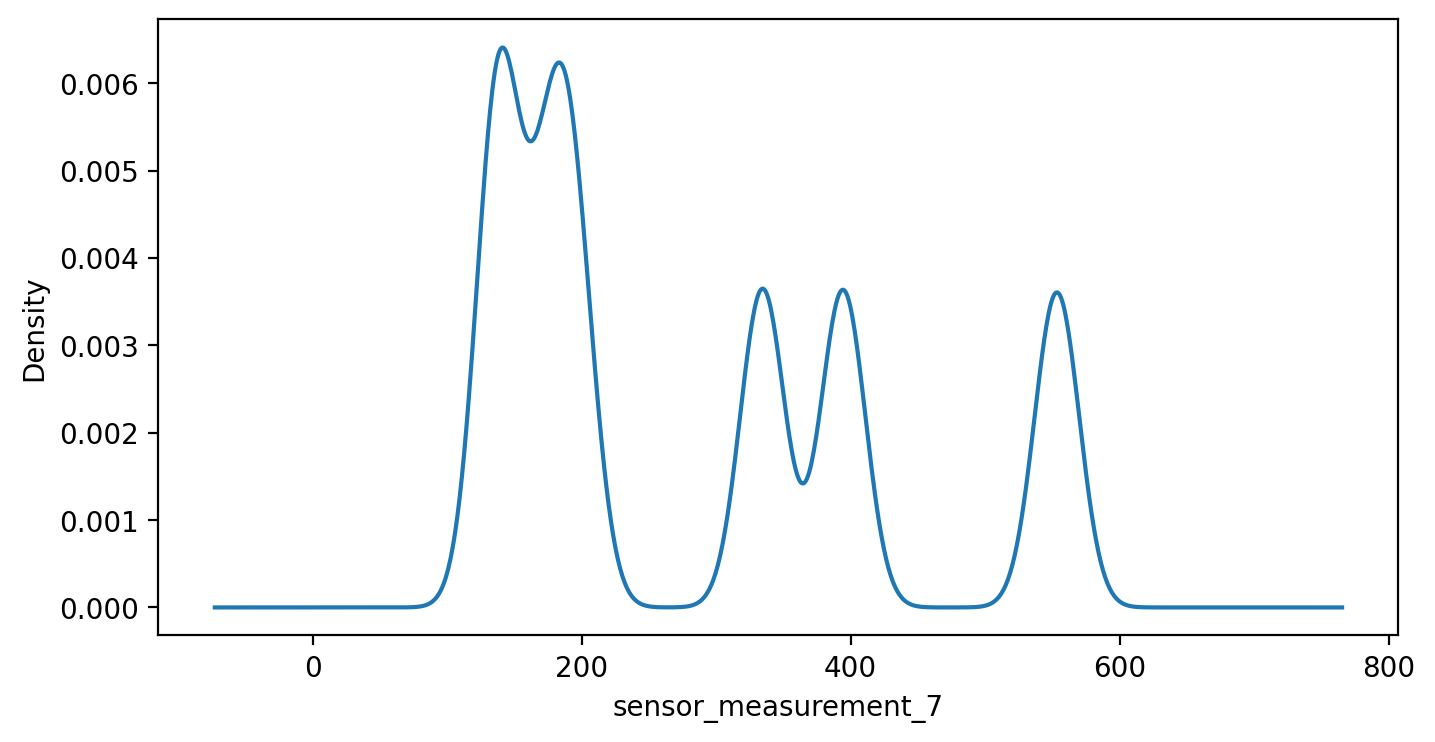

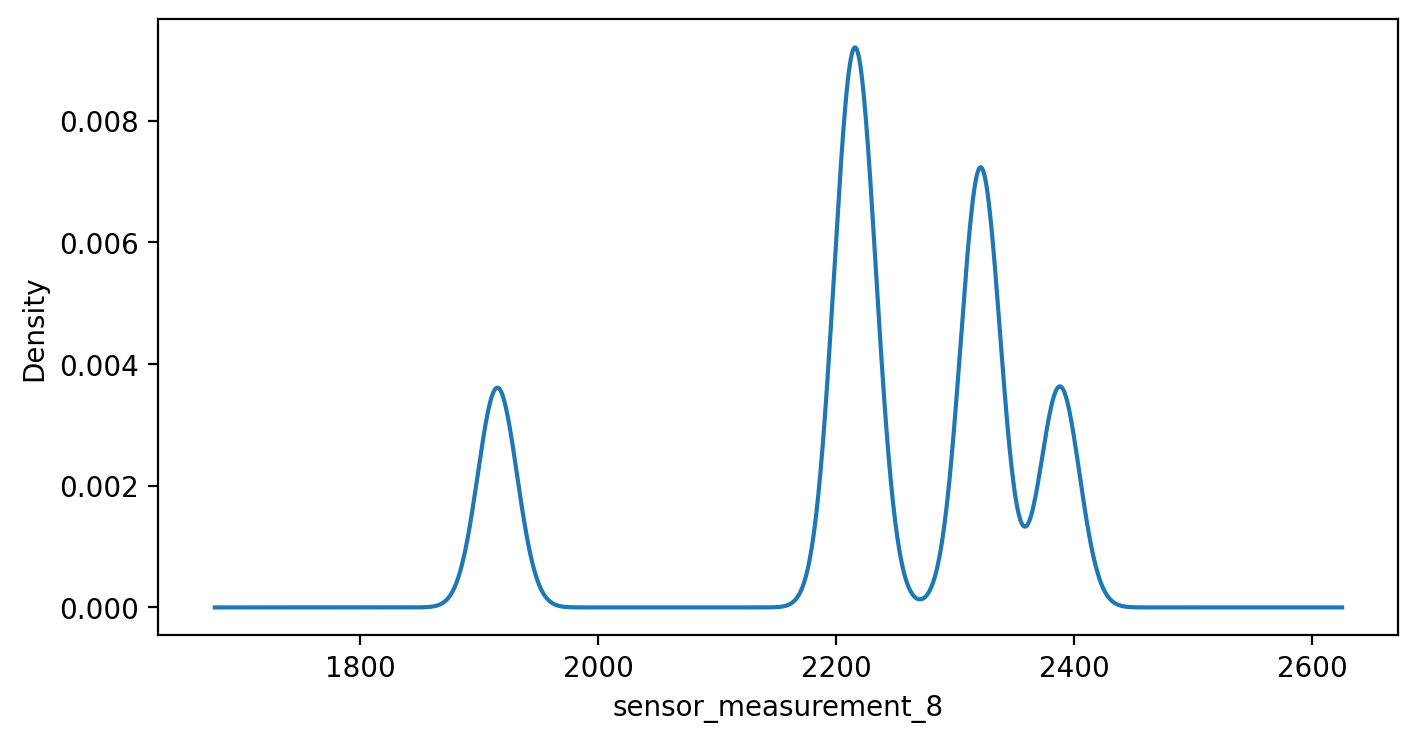

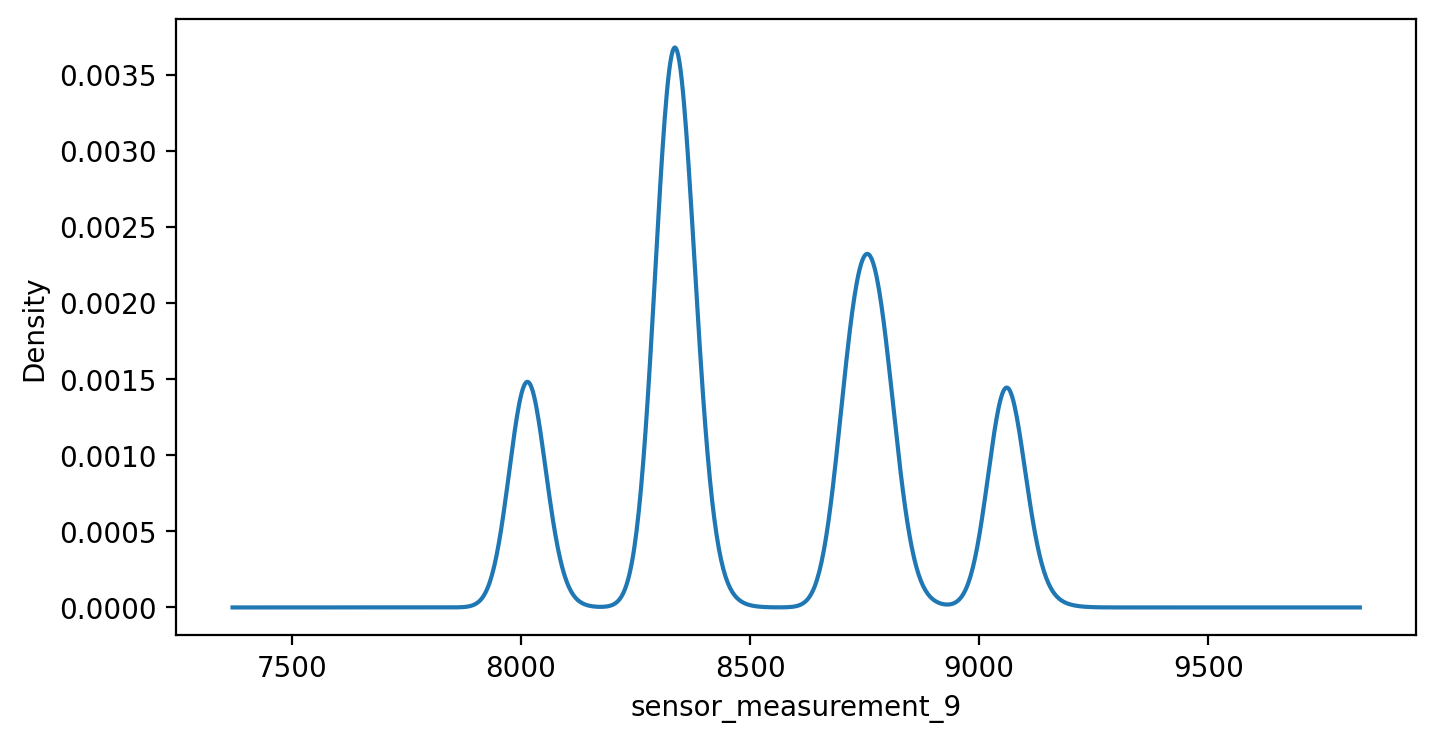

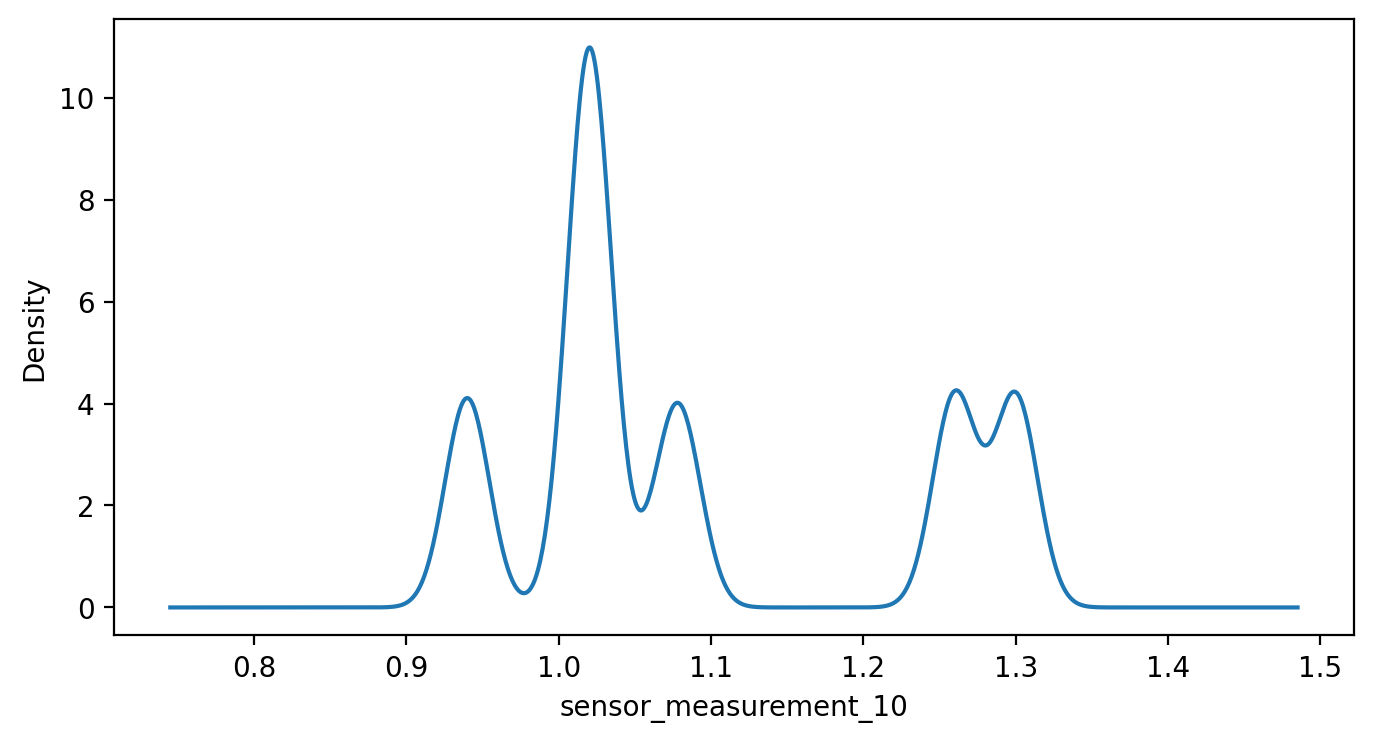

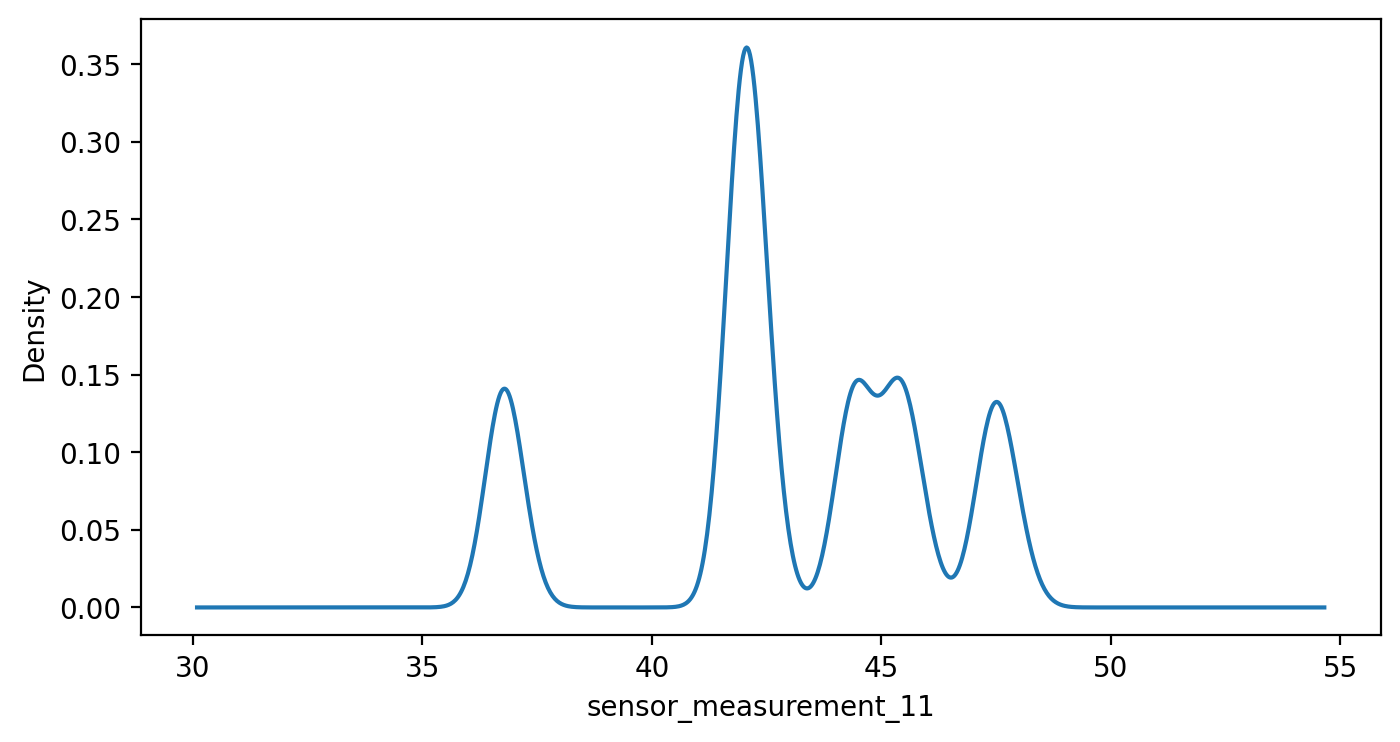

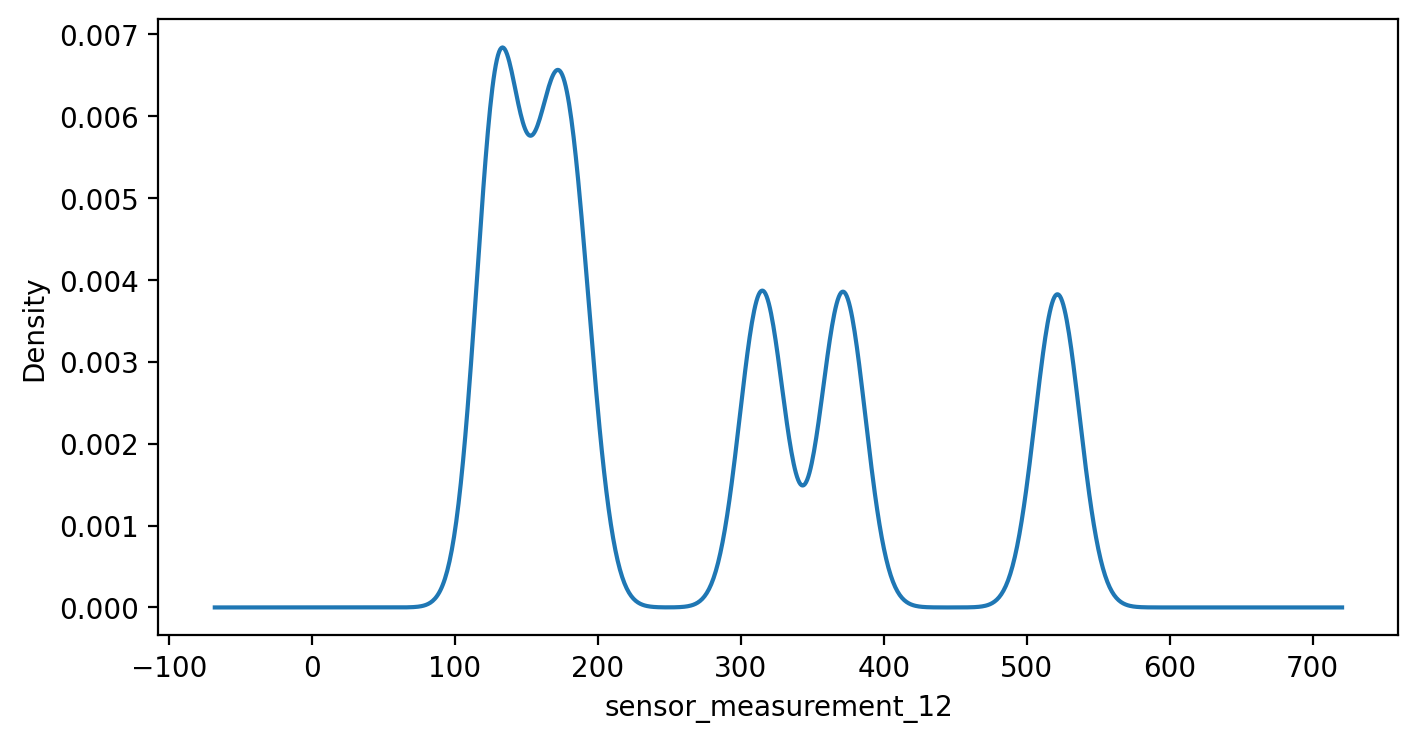

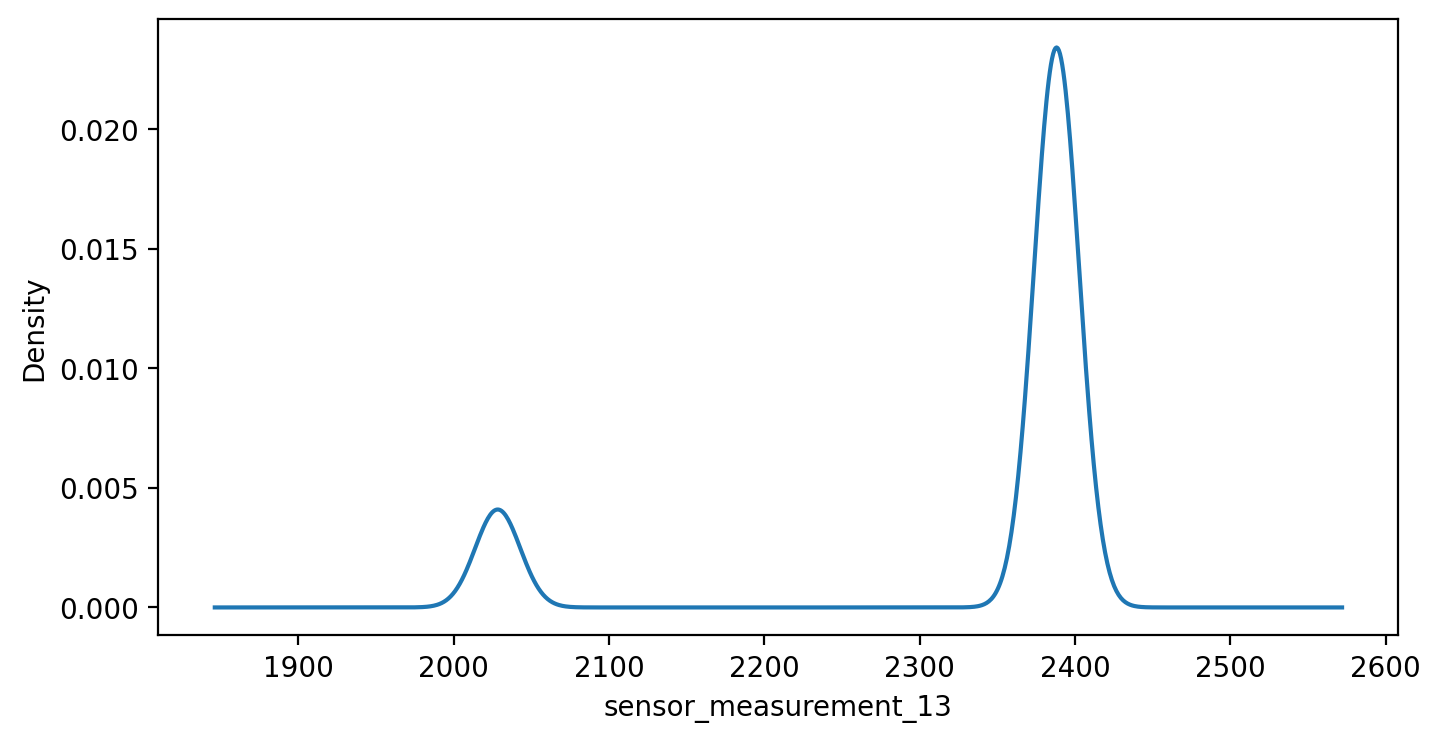

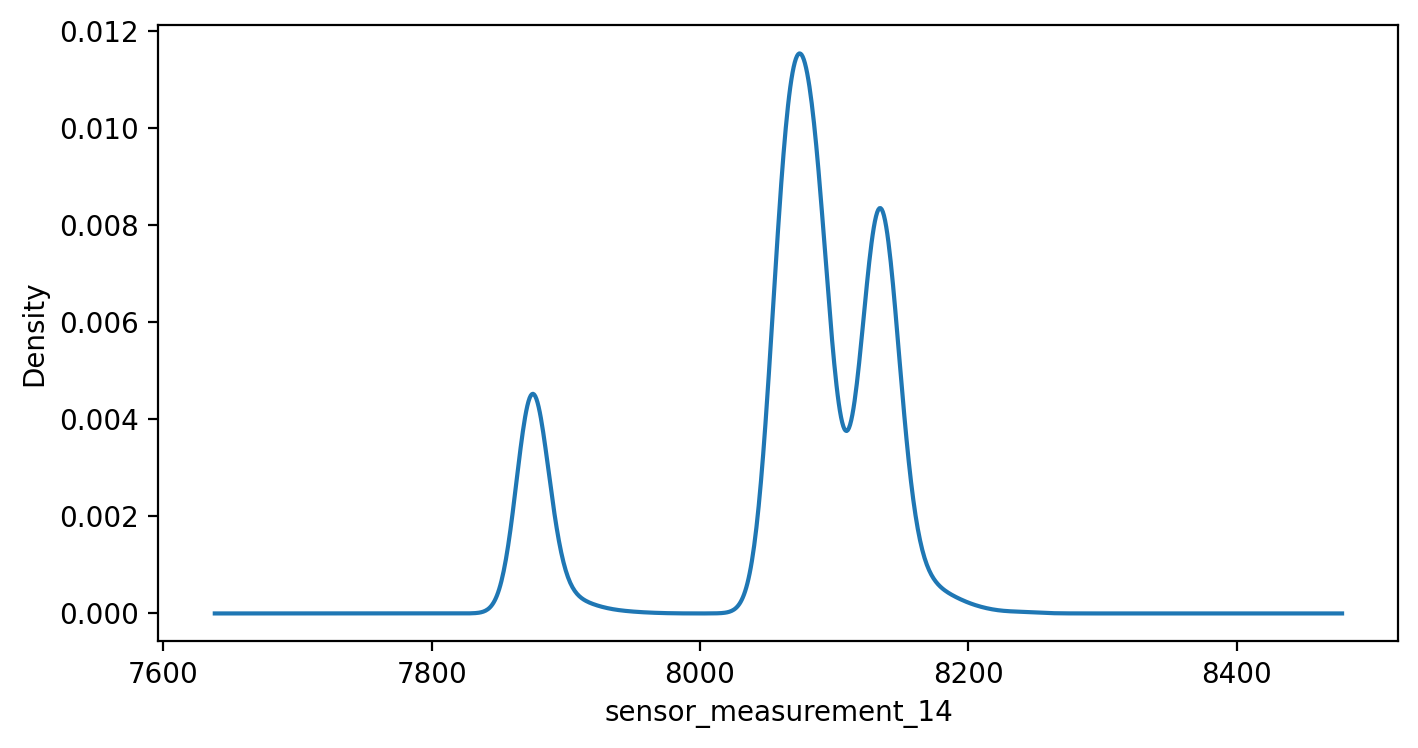

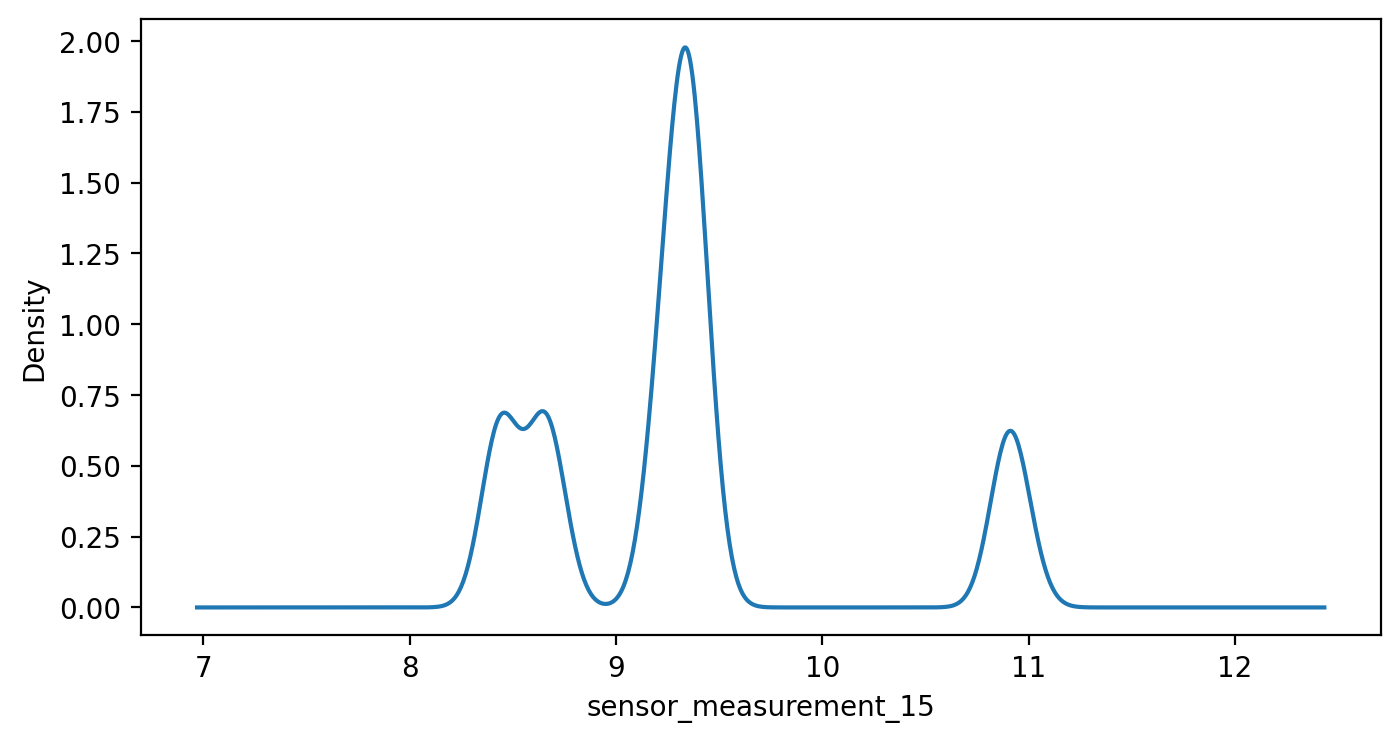

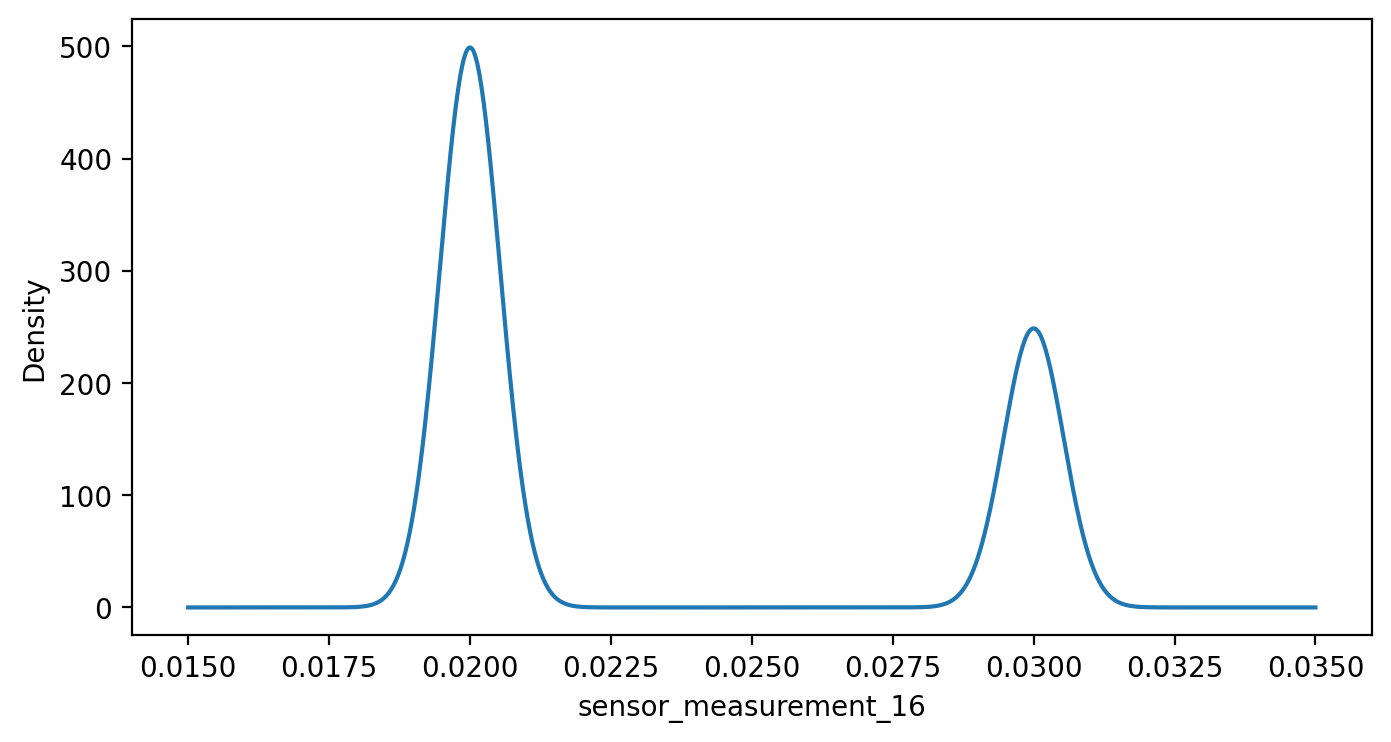

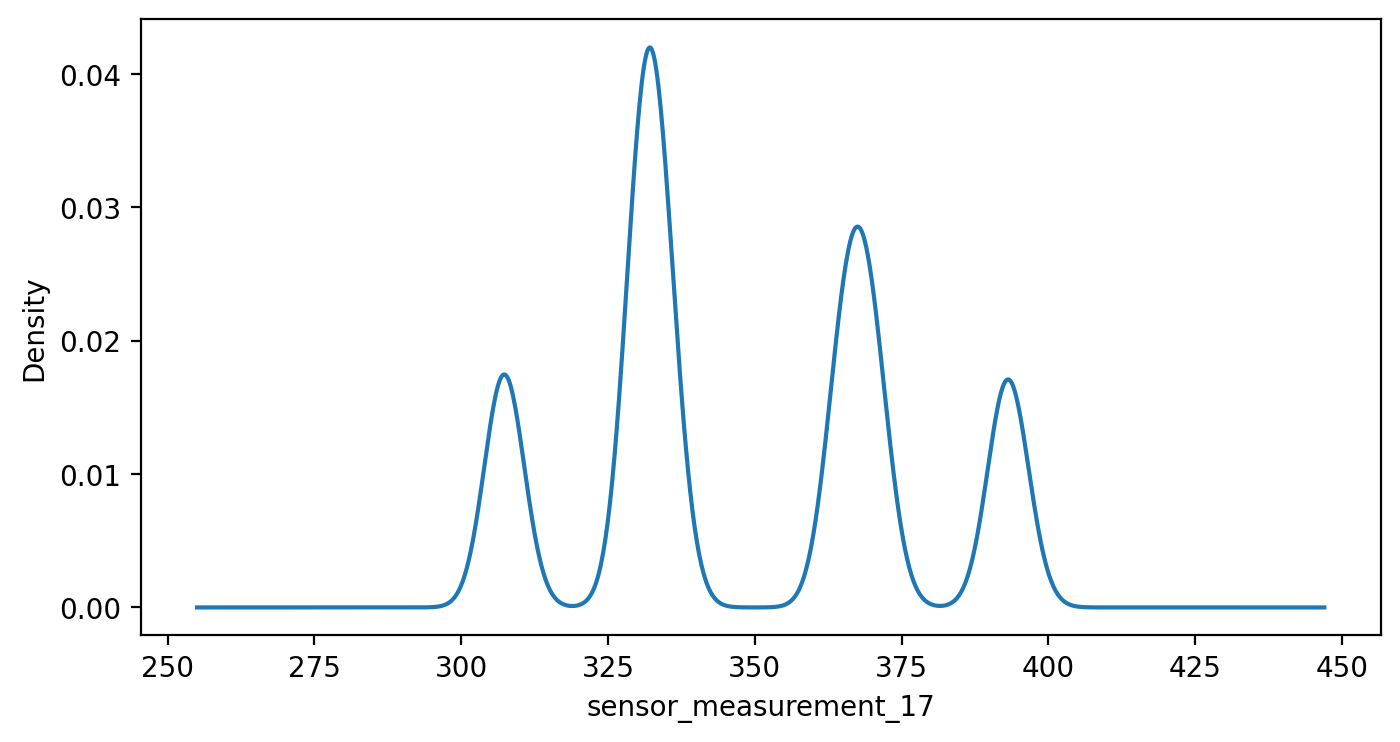

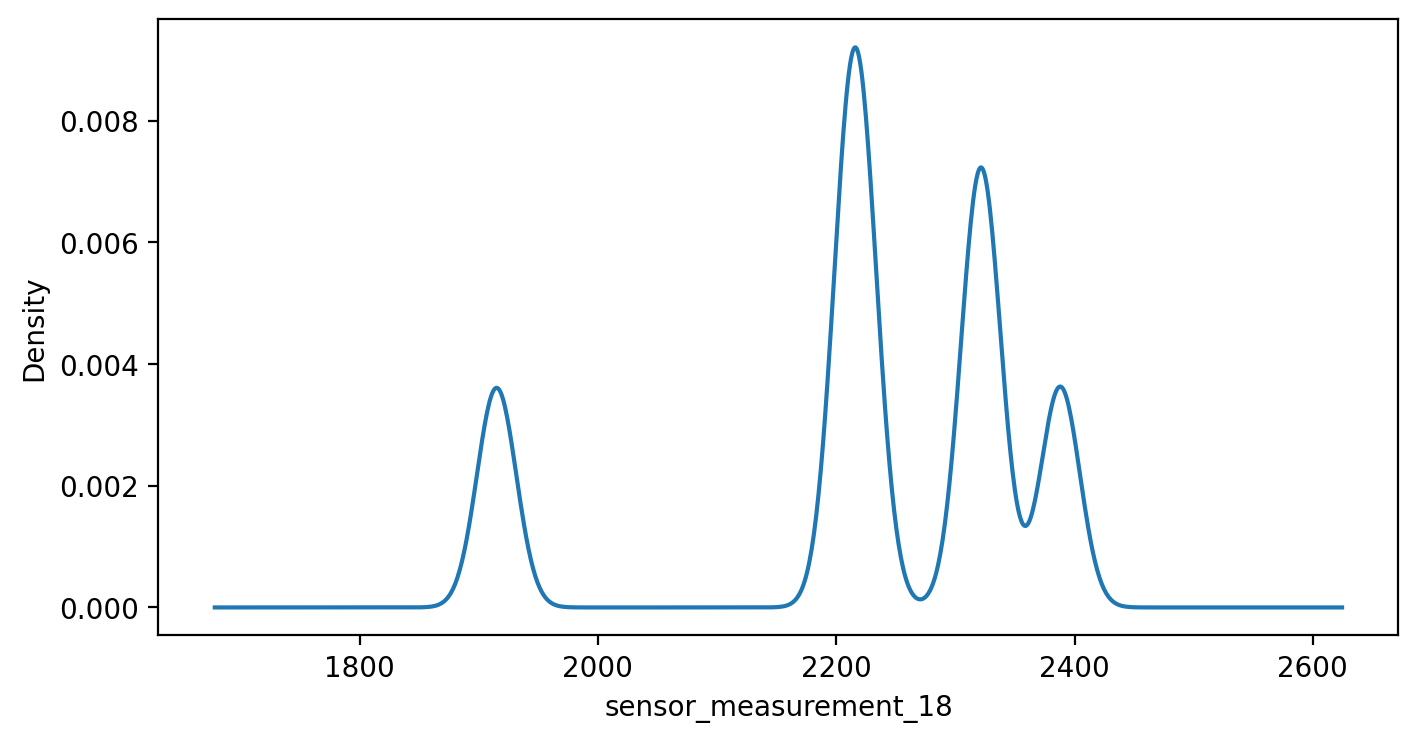

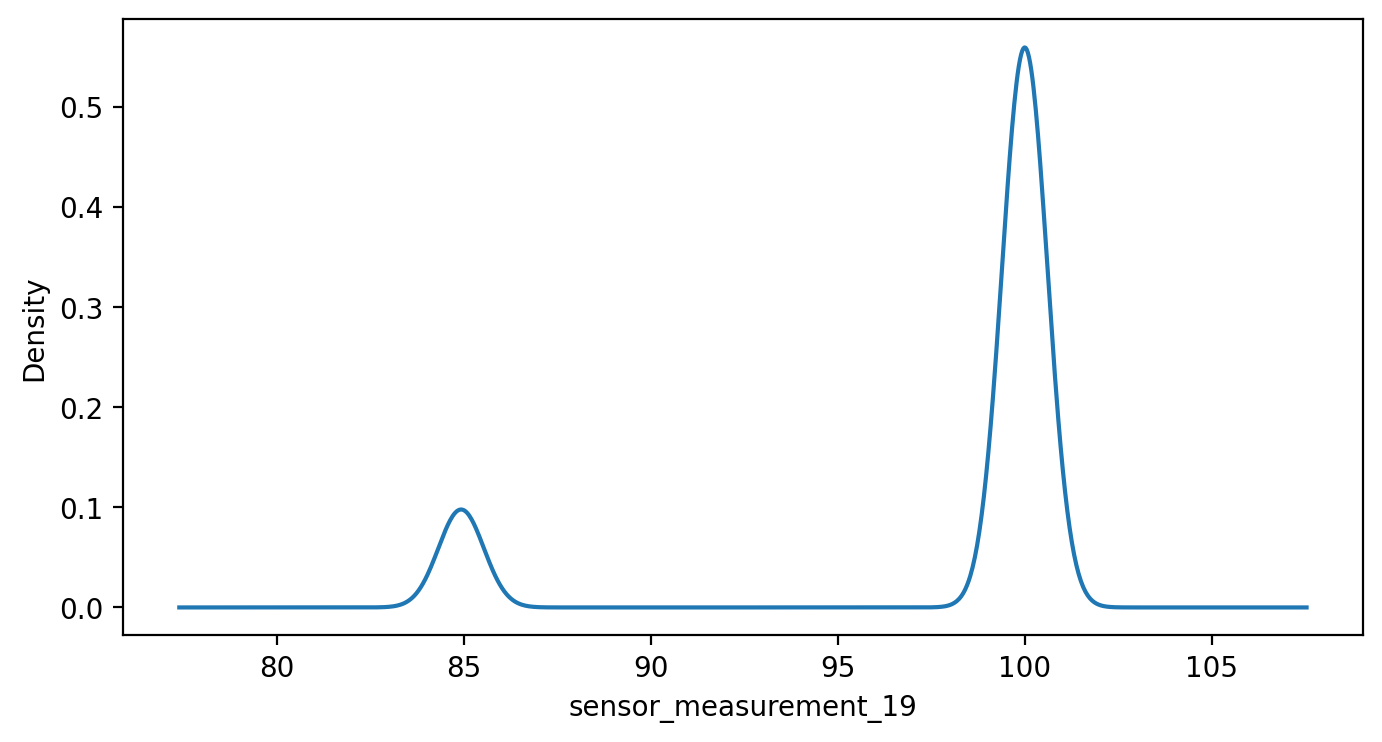

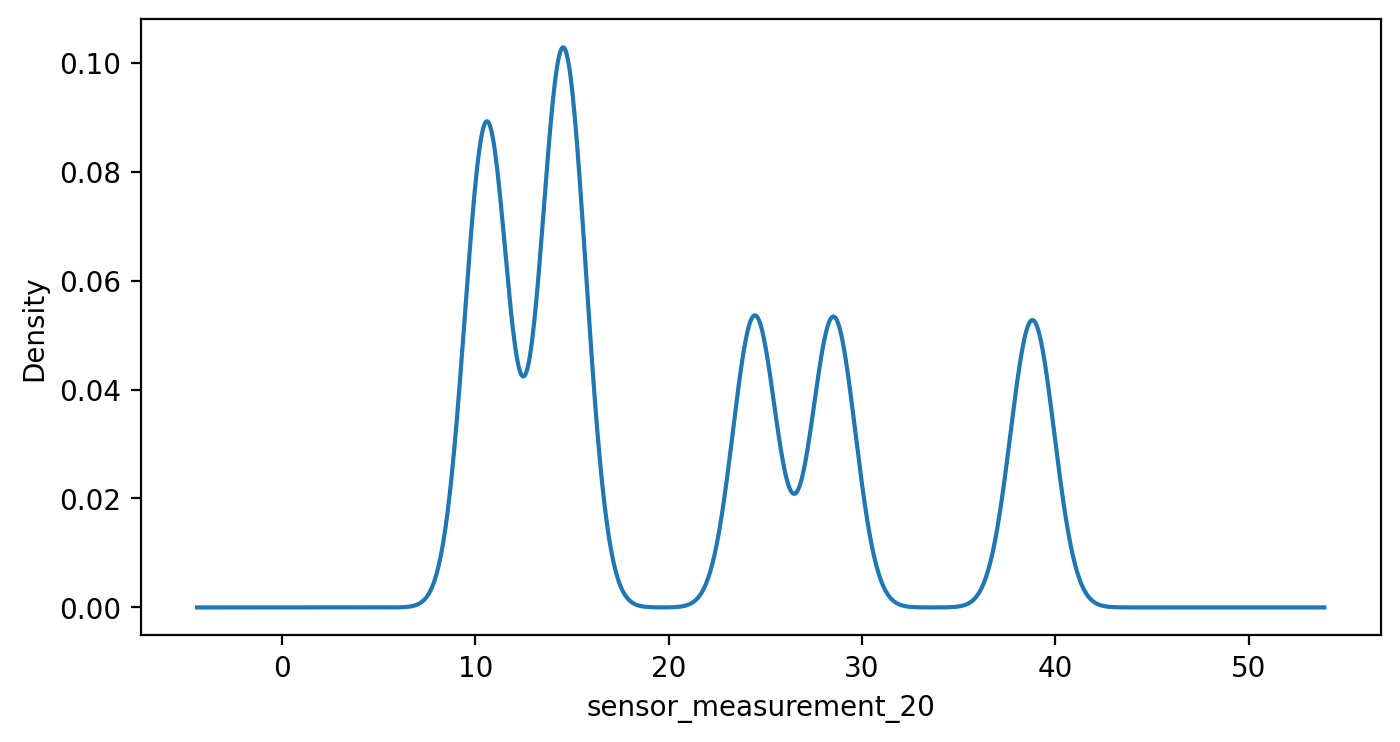

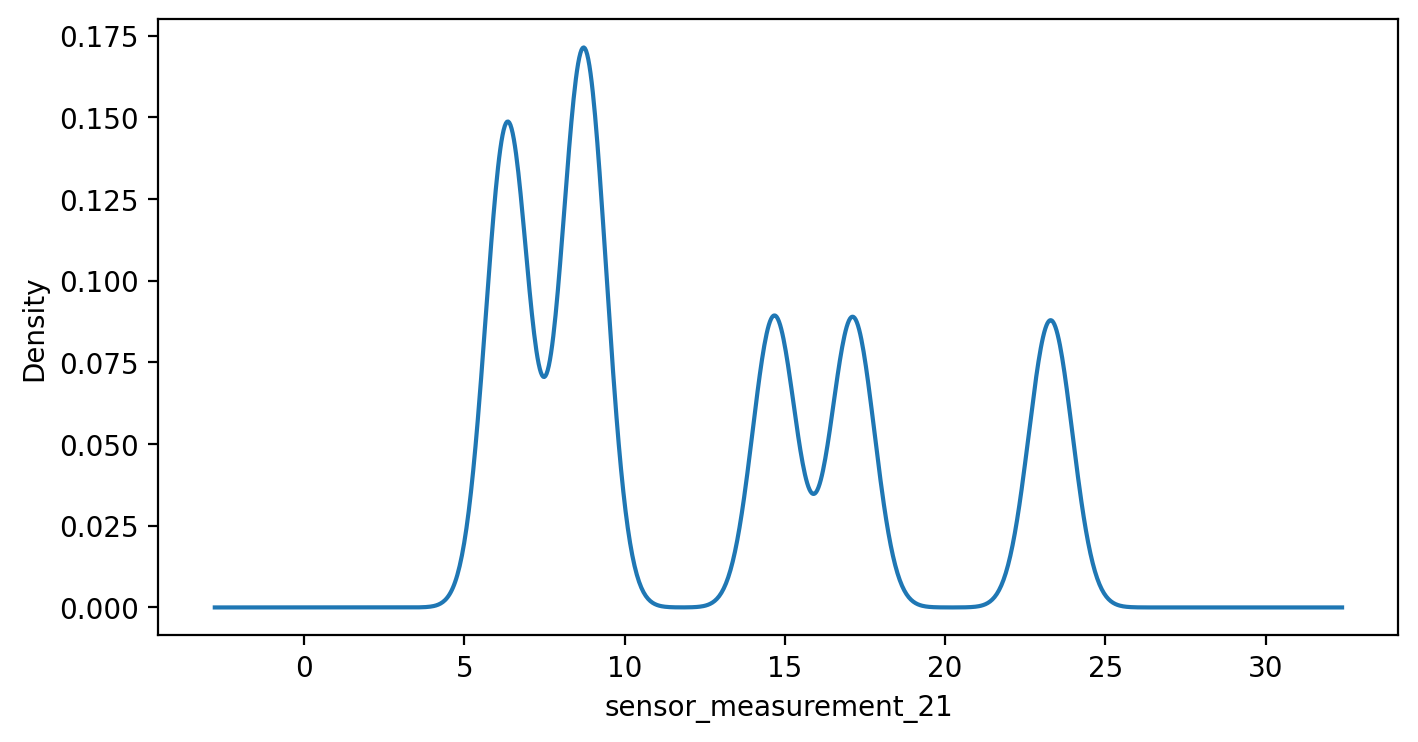

In [10]:
for i in range(1, 22):
    plt.figure(figsize=(8,4), dpi=200)
    df_train[f"sensor_measurement_{i}"].plot(kind='kde')
    plt.xlabel(f'sensor_measurement_{i}')
    plt.show()

In [ ]:
for i in range(1, 4):
    plt.figure(figsize=(8,4), dpi=200)
    df_train[f"operational_setting_{i}"].plot(kind='kde')
    plt.xlabel(f'operational_setting_{i}')
    plt.show()

In [ ]:
for i in df_train:
    print(f"Min of {i} is {df_train[i].min()}")
    print(f"Max of {i} is {df_train[i].max()}")
    print(f"Mean of {i} is {df_train[i].mean()}")
    print(f"std of {i} is {df_train[i].std()}")

In [ ]:
for i in range(1, 22):
    print(f"Unique value of sensor_measurement_{i} is {set(df_train[f'sensor_measurement_{i}'])}")
    print(f"Length of sensor_measurement_{i} is {len(set(df_train[f'sensor_measurement_{i}']))}")

In [11]:
lst = []
for i in range(1, df_train['time_in_cycle'].max() + 1):
    lst.append([i, df_train[df_train['time_in_cycle'] == i].shape[0]])

In [12]:
new_df = pd.DataFrame(lst, columns=['time_cycle', 'number_of_machine'])
new_df

,time_cycle,number_of_machine
0,1,260
1,2,260
2,3,260
3,4,260
4,5,260
...,...,...
373,374,1
374,375,1
375,376,1
376,377,1


Text(0, 0.5, 'number_of_alive_machine')

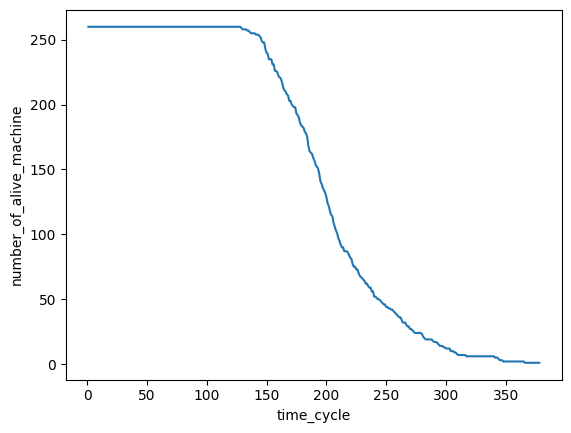

In [13]:
plt.plot(new_df['time_cycle'], new_df['number_of_machine'])

plt.xlabel("time_cycle")
plt.ylabel("number_of_alive_machine")

### From the plot above, we can see that when one machine fails, it will affect the operation of the remaining machines in the following cycles. 

### So, we will consider the impact of all machines in the input of machine learning

### All machines, sensor_measurement, and operational_settings can be considered as three dimesional space. And imagine it as a image with 3 layers (each layer is a dimensional space), so each pixel is the intersection of machine_id and sensor_measurement. And the number of images is the number of time_in_cycle, so from now we can use the CNN (Convolution Neural Network)

In [4]:
def get_array_data(dataframe, window_size=5):
  """Get numpy array data from dataframe"""
  array_df = dataframe.to_numpy()
  X = []
  y = []
  for i in range(len(array_df)-window_size):
    row = [[a] for a in array_df[i:i+window_size]]
    #print(row)
    X.append(row)
    label = array_df[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

#### CALL THE FUNCTION ABOVE TO LOAD NUMPY ARRAY FROM DATAFRAME 

In [5]:
time_in_cycle = df_train['time_in_cycle']
WINDOW_SIZE = 14
X, y = get_array_data(time_in_cycle, WINDOW_SIZE)


#### GET SHAPE OF X (important features including all sensor_measurement and operational_settings), AND y (time_in_cycle)

In [6]:
X.shape, y.shape

((53745, 14, 1), (53745,))

#### SPLIT THE DATA INTO TRAIN DATA AND VALID DATA WITH EACH X_train, y_train, X_valid, y_valid AND GET THEIR SHAPE

In [7]:
X_train, y_train = X[:40000], y[:40000]
X_valid, y_valid = X[40000:], y[40000:]
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((40000, 14, 1), (40000,), (13745, 14, 1), (13745,))

#### LSTM MODEL BUILDING

In [24]:
model_lstm = Sequential()
model_lstm.add(InputLayer((14, 1)))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(8, 'relu'))
model_lstm.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 64)                16896     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
Total params: 17,416
Trainable params: 17,416
Non-trainable params: 0
_________________________________________________________________


#### SAVE LSTM MODEL CHECKPOINTS

In [18]:
cp = ModelCheckpoint('model6/', save_best_only=True)
model_lstm_reg.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

#### TRAINING LSTM MODEL

In [34]:
lstm_history = model_lstm.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, callbacks=[cp])

NameError: name 'cp' is not defined

#### LOADING LSTM MODEL

In [25]:
model_lstm = load_model('model1/')

#### RUL (Remaining Useful Life) AND VISUALIZE RESULT FUNCTIONS

In [26]:
def get_predictions(model, X_value):
    """Get time_in_cycle predictions"""
    predictions = model.predict(X_value).flatten()
    return predictions

def get_predictions_df_train(model, X_value, y_value):
    """Get train prediction in model"""
    predictions = get_predictions(model, X_value)
    results = pd.DataFrame(data={'machine_id': df_train.loc[0:39999, 'machine_id'],'time_in_cycle_pred': (predictions), 'time_in_cycle':y_value})
    return results

def get_predictions_df_valid(model, X_value, y_value):
    """Get valid prediction in model"""
    predictions = get_predictions(model, X_value)
    results = pd.DataFrame(data={'machine_id': df_train.loc[40014:, 'machine_id'],'time_in_cycle_pred': (predictions), 'time_in_cycle':y_value})
    return results

def get_predictions_df_test(model, X_value, y_value):
    """Get valid prediction in model"""
    predictions = get_predictions(model, X_value)
    results = pd.DataFrame(data={'machine_id': df_test.loc[14:,'machine_id'],'time_in_cycle_pred': (predictions), 'time_in_cycle':y_value})
    return results

def merge_prediction_df(model, X_value_train, y_value_train, X_value_valid, y_value_valid):
    predictions_train = get_predictions(model, X_value_train)
    results_train = pd.DataFrame(data={'time_in_cycle_pred': (merge_prediction_df), 'time_in_cycle':y_value_train})
    predictions_valid = get_predictions(model, X_value_valid)
    results_valid = pd.DataFrame(data={'time_in_cycle_pred': (predictions_valid), 'time_in_cycle':y_value_valid})
    train_valid_df = pd.concat([results_train, results_valid])
    train_valid_df.reset_index(inplace=True)
    return train_valid_df

def get_rul_train_valid_df(model, X_value_train, y_value_train, X_value_valid, y_value_valid, df):
    """Get RUL in train data with all columns"""
    train_df_results = get_predictions_df_train(model, X_value_train, y_value_train)
    valid_df_results = get_predictions_df_valid(model, X_value_valid, y_value_valid)
    train_valid_df = pd.concat([train_df_results, valid_df_results])
    grouped_machine_id_actual = train_valid_df.groupby(by='machine_id')
    max_time_in_cycle_actual = grouped_machine_id_actual['time_in_cycle'].max()
    merged = train_valid_df.merge(max_time_in_cycle_actual.to_frame(name='max_time_cycle_actual'), left_on='machine_id',right_index=True)
    grouped_machine_id_pred = merged.groupby(by='machine_id')
    merged['time_in_cycle_pred'] = np.round(merged['time_in_cycle_pred']).astype(int)
    max_time_in_cycle_pred = grouped_machine_id_pred['time_in_cycle_pred'].max()
    new_merged = train_valid_df.merge(max_time_in_cycle_pred.to_frame(name='max_time_cycle_pred'), left_on='machine_id',right_index=True)
    merged = merged.merge(new_merged, left_on=['machine_id', 'time_in_cycle'], right_on=['machine_id', 'time_in_cycle'])
    merged.drop(columns='time_in_cycle_pred_y', inplace=True)
    merged["RUL_pred"] = merged["max_time_cycle_pred"] - merged['time_in_cycle_pred_x']
    merged["RUL_actual"] = merged["max_time_cycle_actual"] - merged['time_in_cycle']
    all_merged = merged.merge(df, left_on=["machine_id", 'time_in_cycle'], right_on=['machine_id', 'time_in_cycle'])
    return all_merged


def get_rul_test(df, test_preds_model):
    """Get RUL in test data with all columns"""
    grouped_machine_id = df.groupby(by='machine_id')
    max_time_in_cycle_actual = grouped_machine_id['time_in_cycle'].max()
    merged_test = df.merge(max_time_in_cycle_actual.to_frame(name='max_time_cycle_actual'), left_on='machine_id',right_index=True)

    for i in range(14):
        merged_test = merged_test.drop(i)
    merged_test.reset_index(inplace=True)

    grouped_machine_id_pred = merged_test.groupby(by='machine_id')
    merged_test['time_in_cycle_pred'] = np.round(test_preds_model).astype(int)
    max_time_in_cycle_pred = grouped_machine_id_pred['time_in_cycle_pred'].max()
    new_merged_test = df.merge(max_time_in_cycle_pred.to_frame(name='max_time_cycle_pred'), left_on='machine_id',right_index=True)

    merged_test = merged_test.merge(new_merged_test, left_on=['machine_id', 'time_in_cycle'], right_on=['machine_id', 'time_in_cycle'])
    merged_test["RUL_pred"] = merged_test["max_time_cycle_pred"] - merged_test['time_in_cycle_pred']
    merged_test["RUL_actual"] = merged_test["max_time_cycle_actual"] - merged_test['time_in_cycle']

    return merged_test

def get_important_features(df):
    """Get results with important columns"""
    return df[['machine_id', 'time_in_cycle', 'time_in_cycle_pred', 'max_time_cycle_actual', 'max_time_cycle_pred', 'RUL_actual', 'RUL_pred']]

def visualize_train_results(df):
    """Visualize train prediction results"""
    plt.plot(df['time_in_cycle_pred'][50:100], label='time_in_cycle_pred')
    plt.plot(df['time_in_cycle'][50:100], label='time_in_cycle')
    plt.xlabel('index')
    plt.ylabel('time_in_cycle')
    plt.legend()

def visualize_val_results(df):
    """Visualize valid prediction result"""
    plt.plot(df['time_in_cycle_pred'][:100], label='time_in_cycle_pred')
    plt.plot(df['time_in_cycle'][:100], label='time_in_cycle')
    plt.xlabel('index')
    plt.ylabel('time_in_cycle')
    plt.legend()

def plot_predictions(model, X, y, start=0, end=100):
    """Plot Predictions and get MSE, and RMSE"""
    predictions = model.predict(X).flatten()

    df = pd.DataFrame(data={'time_in_cycle_pred':(predictions), 'time_in_cycle':y})
    plt.plot(df['time_in_cycle_pred'][start:end], label='time_in_cycle_pred')
    plt.plot(df['time_in_cycle'][start:end], label='time_in_cycle')
    mse_loss = mse(y, predictions)
    rmse_loss = np.sqrt(mse(y, predictions))
 
    print(f"MSE: {mse_loss}")
    print(f"RMSE: {rmse_loss}")

    plt.xlabel('index')
    plt.ylabel('time_in_cycle')
    plt.legend()
    return df


#### TRAIN PREDICTION RESULTS OF LSTM MODEL

In [27]:
train_results_lstm = get_predictions_df_train(model_lstm, X_train, y_train)
train_results_lstm

1250/1250 [==============================] - 3s 2ms/step


,machine_id,time_in_cycle_pred,time_in_cycle
0,1,14.987923,15
1,1,15.952117,16
2,1,16.920919,17
3,1,17.892673,18
4,1,18.866798,19
...,...,...,...
39995,193,108.323982,108
39996,193,109.335709,109
39997,193,110.346466,110
39998,193,111.356056,111


#### VISUALIZE TRAIN PREDICTION RESULTS OF LSTM MODEL

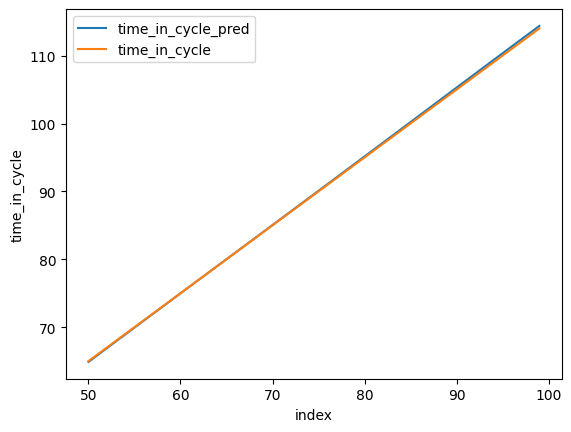

In [28]:
visualize_train_results(train_results_lstm)

#### VALIDATION PREDICTION RESULTS OF LSTM MODEL

In [29]:
valid_results_lstm = get_predictions_df_valid(model_lstm, X_valid, y_valid)
valid_results_lstm

430/430 [==============================] - 1s 2ms/step


,machine_id,time_in_cycle_pred,time_in_cycle
40014,193,113.371323,113
40015,193,114.376633,114
40016,193,115.380272,115
40017,193,116.382095,116
40018,193,117.381973,117
...,...,...,...
53754,260,305.431458,312
53755,260,306.373413,313
53756,260,307.376038,314
53757,260,308.441559,315


#### VISUALIZE VALIDATION PREDICTION RESULTS OF LSTM MODEL

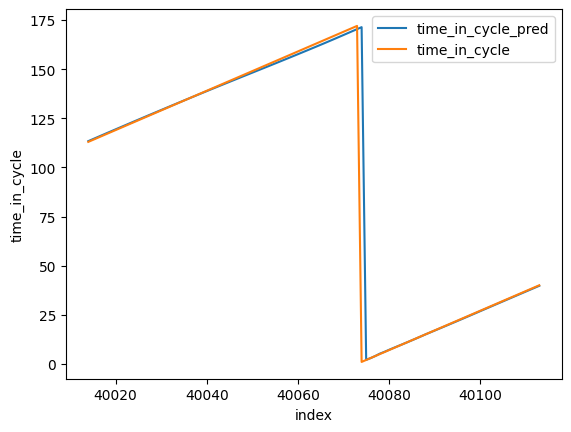

In [30]:
visualize_val_results(valid_results_lstm)

#### GET RUL IN df_train OF LSTM MODEL

In [31]:
rul_train_valid_lstm = get_rul_train_valid_df(model=model_lstm, X_value_train=X_train, X_value_valid=X_valid, y_value_train=y_train, y_value_valid=y_valid, df=df_train)

rul_train_valid_lstm.rename(columns={'time_in_cycle_pred_x': "time_in_cycle_pred"}, inplace=True)
rul_train_valid_lstm

430/430 [==============================] - 1s 2ms/step


,machine_id,time_in_cycle_pred,time_in_cycle,max_time_cycle_actual,max_time_cycle_pred,RUL_pred,RUL_actual,operational_setting_1,operational_setting_2,operational_setting_3,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,15,15,149,149,134,134,10.0038,0.2513,100.0,...,372.03,2388.14,8118.56,8.6079,0.03,369.0,2319.0,100.00,28.54,17.1272
1,1,16,16,149,149,133,133,35.0053,0.8419,100.0,...,182.78,2387.76,8053.94,9.3232,0.02,332.0,2223.0,100.00,14.96,8.9446
2,1,17,17,149,149,132,132,25.0077,0.6217,60.0,...,164.53,2028.03,7857.51,10.8616,0.02,307.0,1915.0,84.93,14.07,8.5935
3,1,18,18,149,149,131,131,34.9996,0.8404,100.0,...,182.72,2387.72,8052.73,9.3419,0.02,334.0,2223.0,100.00,14.99,8.9676
4,1,19,19,149,149,130,130,42.0018,0.8400,100.0,...,130.42,2387.63,8070.70,9.3798,0.02,332.0,2212.0,100.00,10.49,6.4195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53740,260,305,312,316,310,5,4,20.0037,0.7000,100.0,...,314.05,2389.02,8169.64,9.3035,0.03,369.0,2324.0,100.00,24.36,14.5189
53741,260,306,313,316,310,4,3,10.0022,0.2510,100.0,...,371.22,2388.42,8245.36,8.7586,0.03,374.0,2319.0,100.00,28.10,16.9454
53742,260,307,314,316,310,3,2,25.0041,0.6200,60.0,...,163.74,2030.33,7971.25,11.0657,0.02,310.0,1915.0,84.93,14.19,8.5503
53743,260,308,315,316,310,2,1,25.0033,0.6220,60.0,...,164.37,2030.35,7972.47,11.0537,0.02,311.0,1915.0,84.93,14.05,8.3729


#### TRAIN VALID PREDICTION RESULTS WITH IMPORTANT FEATURES IN LSTM MODEL

In [32]:
features_imp_train_valid_lstm = get_important_features(rul_train_valid_lstm)
features_imp_train_valid_lstm

,machine_id,time_in_cycle,time_in_cycle_pred,max_time_cycle_actual,max_time_cycle_pred,RUL_actual,RUL_pred
0,1,15,15,149,149,134,134
1,1,16,16,149,149,133,133
2,1,17,17,149,149,132,132
3,1,18,18,149,149,131,131
4,1,19,19,149,149,130,130
...,...,...,...,...,...,...,...
53740,260,312,305,316,310,4,5
53741,260,313,306,316,310,3,4
53742,260,314,307,316,310,2,3
53743,260,315,308,316,310,1,2


#### LOAD TEST DATA

In [33]:
df_test = pd.read_csv('data_test.txt', sep=' ', header=None, names=['machine_id', 'time_in_cycle',
                                                                    'operational_setting_1', 'operational_setting_2',
                                                                    'operational_setting_3', 'sensor_measurement_1',
                                                                    'sensor_measurement_2', 'sensor_measurement_3',
                                                                    'sensor_measurement_4', 'sensor_measurement_5',
                                                                    'sensor_measurement_6', 'sensor_measurement_7',
                                                                    'sensor_measurement_8', 'sensor_measurement_9',
                                                                    'sensor_measurement_10', 'sensor_measurement_11',
                                                                    'sensor_measurement_12', 'sensor_measurement_13',
                                                                    'sensor_measurement_14', 'sensor_measurement_15',
                                                                    'sensor_measurement_16', 'sensor_measurement_17',
                                                                    'sensor_measurement_18', 'sensor_measurement_19',
                                                                    'sensor_measurement_20', 'sensor_measurement_21',
                                                                    'sensor_measurement_22', 'sensor_measurement_23',
                                                                    'sensor_measurement_24', 'sensor_measurement_25',
                                                                    'sensor_measurement_26'])
df_test.drop(columns=['sensor_measurement_22', 'sensor_measurement_23', 'sensor_measurement_24',
                                'sensor_measurement_25', 'sensor_measurement_26'], inplace=True)
df_test['sensor_measurement_17'] = df_test['sensor_measurement_17'].astype(float)
df_test['sensor_measurement_18'] = df_test['sensor_measurement_18'].astype(float)
df_test

,machine_id,time_in_cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369.0,2319.0,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364.0,2324.0,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333.0,2223.0,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332.0,2212.0,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305.0,1915.0,84.93,14.31,8.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,183.05,2388.39,8088.36,9.3215,0.02,334.0,2223.0,100.00,14.94,8.9065
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,130.74,2388.31,8108.48,9.3542,0.02,332.0,2212.0,100.00,10.57,6.4075
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,130.96,2388.34,8098.77,9.3836,0.02,331.0,2212.0,100.00,10.57,6.4805
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,522.25,2388.00,8161.85,8.4279,0.03,393.0,2388.0,100.00,39.08,23.3589


#### LOAD NUMPY ARRAY FROM DATAFRAME 

In [34]:
time_in_cycle_test = df_test['time_in_cycle']
X_test, y_test = get_array_data(time_in_cycle_test, 14)
X_test.shape, y_test.shape

((33977, 14, 1), (33977,))

#### TEST PREDICTION RESULTS OF TEST DATA IN LSTM MODEL

In [35]:
test_results_lstm = get_predictions_df_test(model_lstm, X_test, y_test)
test_results_lstm

1062/1062 [==============================] - 3s 2ms/step


,machine_id,time_in_cycle_pred,time_in_cycle
14,1,14.987923,15
15,1,15.952117,16
16,1,16.920919,17
17,1,17.892673,18
18,1,18.866798,19
...,...,...,...
33986,259,119.375557,119
33987,259,120.369133,120
33988,259,121.360550,121
33989,259,122.349678,122


#### GET RUL (REMANING USEFUL LIFE) IN df_test OF LSTM MODEL

In [36]:
test_preds_lstm = get_predictions(model=model_lstm, X_value=X_test)
rul_test_lstm = get_rul_test(df=df_test, test_preds_model=test_preds_lstm)
rul_test_lstm.drop(columns=['operational_setting_1_y',
       'operational_setting_2_y', 'operational_setting_3_y',
       'sensor_measurement_1_y', 'sensor_measurement_2_y',
       'sensor_measurement_3_y', 'sensor_measurement_4_y',
       'sensor_measurement_5_y', 'sensor_measurement_6_y',
       'sensor_measurement_7_y', 'sensor_measurement_8_y',
       'sensor_measurement_9_y', 'sensor_measurement_10_y',
       'sensor_measurement_11_y', 'sensor_measurement_12_y',
       'sensor_measurement_13_y', 'sensor_measurement_14_y',
       'sensor_measurement_15_y', 'sensor_measurement_16_y',
       'sensor_measurement_17_y', 'sensor_measurement_18_y',
       'sensor_measurement_19_y', 'sensor_measurement_20_y',
       'sensor_measurement_21_y',], inplace=True)

rul_test_lstm.rename(columns={'operational_setting_1_x': 'operational_setting_1',
                              'operational_setting_2_x': 'operational_setting_2',
                              'operational_setting_3_x': 'operational_setting_3',
                              'sensor_measurement_1_x': 'sensor_measurement_1',
                              'sensor_measurement_2_x': 'sensor_measurement_2',
                              'sensor_measurement_3_x': 'sensor_measurement_3',
                              'sensor_measurement_4_x': 'sensor_measurement_4',
                              'sensor_measurement_5_x': 'sensor_measurement_5',
                              'sensor_measurement_6_x': 'sensor_measurement_6',
                              'sensor_measurement_7_x': 'sensor_measurement_7',
                              'sensor_measurement_8_x': 'sensor_measurement_8',
                              'sensor_measurement_9_x': 'sensor_measurement_9',
                              'sensor_measurement_10_x': 'sensor_measurement_10',
                              'sensor_measurement_11_x': 'sensor_measurement_11',
                              'sensor_measurement_12_x': 'sensor_measurement_12',
                              'sensor_measurement_13_x': 'sensor_measurement_13',
                              'sensor_measurement_14_x': 'sensor_measurement_14',
                              'sensor_measurement_15_x': 'sensor_measurement_15',
                              'sensor_measurement_16_x': 'sensor_measurement_16',
                              'sensor_measurement_17_x': 'sensor_measurement_17',
                              'sensor_measurement_18_x': 'sensor_measurement_18',
                              'sensor_measurement_19_x': 'sensor_measurement_19',
                              'sensor_measurement_20_x': 'sensor_measurement_20',
                              'sensor_measurement_21_x': 'sensor_measurement_21',}, inplace=True)
rul_test_lstm

1062/1062 [==============================] - 3s 2ms/step


,index,machine_id,time_in_cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,...,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,max_time_cycle_actual,time_in_cycle_pred,max_time_cycle_pred,RUL_pred,RUL_actual
0,14,1,15,0.0028,0.0000,100.0,518.67,642.68,1588.08,1405.52,...,391.0,2388.0,100.00,38.92,23.3790,258,15,253,238,243
1,15,1,16,25.0039,0.6201,60.0,462.54,536.85,1255.39,1045.72,...,308.0,1915.0,84.93,14.30,8.6670,258,16,253,237,242
2,16,1,17,25.0046,0.6200,60.0,462.54,536.43,1263.53,1052.85,...,306.0,1915.0,84.93,14.44,8.6406,258,17,253,236,241
3,17,1,18,20.0066,0.7000,100.0,491.19,607.55,1484.77,1254.02,...,365.0,2324.0,100.00,24.33,14.6571,258,18,253,235,240
4,18,1,19,42.0018,0.8408,100.0,445.00,549.74,1349.26,1128.53,...,330.0,2212.0,100.00,10.55,6.3165,258,19,253,234,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33972,33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,...,334.0,2223.0,100.00,14.94,8.9065,123,119,123,4,4
33973,33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,...,332.0,2212.0,100.00,10.57,6.4075,123,120,123,3,3
33974,33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,...,331.0,2212.0,100.00,10.57,6.4805,123,121,123,2,2
33975,33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,...,393.0,2388.0,100.00,39.08,23.3589,123,122,123,1,1


#### TEST PREDICTION RESULTS WITH IMPORTANT FEATURES IN LSTM MODEL

In [37]:
features_imp_test_lstm = get_important_features(rul_test_lstm)
features_imp_test_lstm

,machine_id,time_in_cycle,time_in_cycle_pred,max_time_cycle_actual,max_time_cycle_pred,RUL_actual,RUL_pred
0,1,15,15,258,253,243,238
1,1,16,16,258,253,242,237
2,1,17,17,258,253,241,236
3,1,18,18,258,253,240,235
4,1,19,19,258,253,239,234
...,...,...,...,...,...,...,...
33972,259,119,119,123,123,4,4
33973,259,120,120,123,123,3,3
33974,259,121,121,123,123,2,2
33975,259,122,122,123,123,1,1


In [41]:
predictions = model_lstm.predict(X_train).flatten()
mse_loss = mse(y_train, predictions)
rmse_loss = np.sqrt(mse(y_train, predictions))
print(f"MSE: {mse_loss}")
print(f"RMSE: {rmse_loss}")

1250/1250 [==============================] - 3s 2ms/step
MSE: 213.67161474740846
RMSE: 14.617510552327591


In [42]:
predictions = model_lstm.predict(X_valid).flatten()
mse_loss = mse(y_valid, predictions)
rmse_loss = np.sqrt(mse(y_valid, predictions))
print(f"MSE: {mse_loss}")
print(f"RMSE: {rmse_loss}")

430/430 [==============================] - 1s 2ms/step
MSE: 204.49854644482528
RMSE: 14.30029882361992


#### TEST PREDICTION VISUALIZATION, MSE, AND RMSE RESULT

1062/1062 [==============================] - 3s 2ms/step
MSE: 158.86167327981974
RMSE: 12.604034008198317


,time_in_cycle_pred,time_in_cycle
0,14.987923,15
1,15.952117,16
2,16.920919,17
3,17.892673,18
4,18.866798,19
...,...,...
33972,119.375557,119
33973,120.369133,120
33974,121.360550,121
33975,122.349678,122


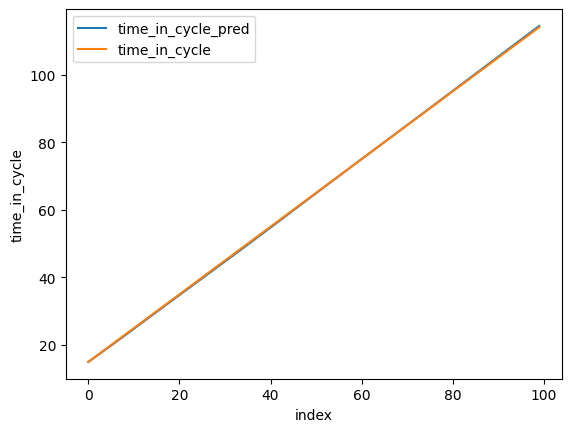

In [43]:
plot_predictions(model_lstm,X_test,y_test)
# plot_predictions()

#### MLP MODEL BUILDING

In [8]:
model_mlp = Sequential()
model_mlp.add(InputLayer(14, 1))
model_mlp.add(Dense(100, 'relu'))
model_mlp.add(Dense(1, 'linear'))
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 100)                  1500      
                                                                 
 dense_1 (Dense)             (1, 1)                    101       
                                                                 
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


#### SAVE MLP MODEL CHECKPOINTS

In [9]:
cp2 = ModelCheckpoint('model4/', save_best_only=True)
model_mlp.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

#### TRAINING MLP MODEL 

In [10]:
mlp_history = model_mlp.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, callbacks=[cp2])

Epoch 1/50
1236/1250 [============================>.] - ETA: 0s - loss: 1182.9562 - root_mean_squared_error: 34.3941

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1250/1250 [==============================] - 3s 2ms/step - loss: 1174.7181 - root_mean_squared_error: 34.2742 - val_loss: 295.6739 - val_root_mean_squared_error: 17.1952
Epoch 2/50
1249/1250 [============================>.] - ETA: 0s - loss: 282.1030 - root_mean_squared_error: 16.7959

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1250/1250 [==============================] - 2s 2ms/step - loss: 281.8867 - root_mean_squared_error: 16.7895 - val_loss: 247.5800 - val_root_mean_squared_error: 15.7347
Epoch 3/50
1234/1250 [============================>.] - ETA: 0s - loss: 247.3830 - root_mean_squared_error: 15.7284

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1250/1250 [==============================] - 2s 2ms/step - loss: 247.5986 - root_mean_squared_error: 15.7353 - val_loss: 224.1399 - val_root_mean_squared_error: 14.9713
Epoch 4/50
1211/1250 [============================>.] - ETA: 0s - loss: 233.7136 - root_mean_squared_error: 15.2877

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1250/1250 [==============================] - 2s 2ms/step - loss: 231.2700 - root_mean_squared_error: 15.2076 - val_loss: 215.2491 - val_root_mean_squared_error: 14.6714
Epoch 5/50
1237/1250 [============================>.] - ETA: 0s - loss: 223.2792 - root_mean_squared_error: 14.9425

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1250/1250 [==============================] - 2s 2ms/step - loss: 223.2030 - root_mean_squared_error: 14.9400 - val_loss: 209.5633 - val_root_mean_squared_error: 14.4763
Epoch 6/50
1241/1250 [============================>.] - ETA: 0s - loss: 221.8051 - root_mean_squared_error: 14.8931

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1250/1250 [==============================] - 2s 2ms/step - loss: 220.2239 - root_mean_squared_error: 14.8399 - val_loss: 208.5391 - val_root_mean_squared_error: 14.4409
Epoch 7/50
1250/1250 [==============================] - 2s 1ms/step - loss: 218.3257 - root_mean_squared_error: 14.7758 - val_loss: 215.4191 - val_root_mean_squared_error: 14.6772
Epoch 8/50
1250/1250 [==============================] - 2s 1ms/step - loss: 218.8802 - root_mean_squared_error: 14.7946 - val_loss: 215.0903 - val_root_mean_squared_error: 14.6660
Epoch 9/50
1248/1250 [============================>.] - ETA: 0s - loss: 218.9727 - root_mean_squared_error: 14.7977

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1250/1250 [==============================] - 2s 2ms/step - loss: 218.6252 - root_mean_squared_error: 14.7860 - val_loss: 205.8983 - val_root_mean_squared_error: 14.3492
Epoch 10/50
1250/1250 [==============================] - 2s 1ms/step - loss: 217.6795 - root_mean_squared_error: 14.7540 - val_loss: 213.3933 - val_root_mean_squared_error: 14.6080
Epoch 11/50
1250/1250 [==============================] - 2s 1ms/step - loss: 217.9693 - root_mean_squared_error: 14.7638 - val_loss: 205.9653 - val_root_mean_squared_error: 14.3515
Epoch 12/50
1250/1250 [==============================] - 2s 1ms/step - loss: 218.9228 - root_mean_squared_error: 14.7960 - val_loss: 211.7553 - val_root_mean_squared_error: 14.5518
Epoch 13/50
1250/1250 [==============================] - 2s 1ms/step - loss: 217.5659 - root_mean_squared_error: 14.7501 - val_loss: 207.5065 - val_root_mean_squared_error: 14.4051
Epoch 14/50
1250/1250 [==============================] - 2s 1ms/step - loss: 217.7616 - root_mean_squared_e

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1250/1250 [==============================] - 2s 2ms/step - loss: 218.8339 - root_mean_squared_error: 14.7930 - val_loss: 204.8251 - val_root_mean_squared_error: 14.3117
Epoch 16/50
1250/1250 [==============================] - 2s 1ms/step - loss: 217.8124 - root_mean_squared_error: 14.7585 - val_loss: 205.1435 - val_root_mean_squared_error: 14.3228
Epoch 17/50
1250/1250 [==============================] - 2s 1ms/step - loss: 218.9569 - root_mean_squared_error: 14.7972 - val_loss: 205.5229 - val_root_mean_squared_error: 14.3361
Epoch 18/50
1250/1250 [==============================] - 2s 1ms/step - loss: 217.8710 - root_mean_squared_error: 14.7605 - val_loss: 205.9114 - val_root_mean_squared_error: 14.3496
Epoch 19/50
1250/1250 [==============================] - 2s 1ms/step - loss: 217.6653 - root_mean_squared_error: 14.7535 - val_loss: 205.1176 - val_root_mean_squared_error: 14.3219
Epoch 20/50
1244/1250 [============================>.] - ETA: 0s - loss: 219.8378 - root_mean_squared_error

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1250/1250 [==============================] - 2s 2ms/step - loss: 218.8021 - root_mean_squared_error: 14.7920 - val_loss: 204.7932 - val_root_mean_squared_error: 14.3106
Epoch 21/50
1250/1250 [==============================] - 2s 1ms/step - loss: 218.2435 - root_mean_squared_error: 14.7731 - val_loss: 205.0971 - val_root_mean_squared_error: 14.3212
Epoch 22/50
1250/1250 [==============================] - 2s 1ms/step - loss: 218.9398 - root_mean_squared_error: 14.7966 - val_loss: 206.6438 - val_root_mean_squared_error: 14.3751
Epoch 23/50
1250/1250 [==============================] - 2s 1ms/step - loss: 219.1092 - root_mean_squared_error: 14.8023 - val_loss: 207.3394 - val_root_mean_squared_error: 14.3993
Epoch 24/50
1250/1250 [==============================] - 2s 1ms/step - loss: 217.3640 - root_mean_squared_error: 14.7433 - val_loss: 210.7635 - val_root_mean_squared_error: 14.5177
Epoch 25/50
1250/1250 [==============================] - 2s 1ms/step - loss: 218.3992 - root_mean_squared_e

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1250/1250 [==============================] - 2s 2ms/step - loss: 218.0193 - root_mean_squared_error: 14.7655 - val_loss: 204.3402 - val_root_mean_squared_error: 14.2948
Epoch 27/50
1250/1250 [==============================] - 2s 1ms/step - loss: 217.6888 - root_mean_squared_error: 14.7543 - val_loss: 204.4039 - val_root_mean_squared_error: 14.2970
Epoch 28/50
1250/1250 [==============================] - 2s 1ms/step - loss: 217.9373 - root_mean_squared_error: 14.7627 - val_loss: 204.9089 - val_root_mean_squared_error: 14.3146
Epoch 29/50
1250/1250 [==============================] - 2s 1ms/step - loss: 218.3046 - root_mean_squared_error: 14.7751 - val_loss: 205.1077 - val_root_mean_squared_error: 14.3216
Epoch 30/50
1250/1250 [==============================] - 2s 1ms/step - loss: 218.5405 - root_mean_squared_error: 14.7831 - val_loss: 232.5479 - val_root_mean_squared_error: 15.2495
Epoch 31/50
1250/1250 [==============================] - 2s 1ms/step - loss: 218.3482 - root_mean_squared_e

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1250/1250 [==============================] - 2s 2ms/step - loss: 217.3330 - root_mean_squared_error: 14.7422 - val_loss: 204.3318 - val_root_mean_squared_error: 14.2945
Epoch 41/50
1250/1250 [==============================] - 2s 1ms/step - loss: 218.0401 - root_mean_squared_error: 14.7662 - val_loss: 204.7955 - val_root_mean_squared_error: 14.3107
Epoch 42/50
1250/1250 [==============================] - 2s 1ms/step - loss: 218.7725 - root_mean_squared_error: 14.7910 - val_loss: 209.5856 - val_root_mean_squared_error: 14.4771
Epoch 43/50
1250/1250 [==============================] - 2s 1ms/step - loss: 217.4878 - root_mean_squared_error: 14.7475 - val_loss: 210.3164 - val_root_mean_squared_error: 14.5023
Epoch 44/50
1250/1250 [==============================] - 2s 1ms/step - loss: 218.0022 - root_mean_squared_error: 14.7649 - val_loss: 204.4807 - val_root_mean_squared_error: 14.2997
Epoch 45/50
1250/1250 [==============================] - 2s 1ms/step - loss: 218.1942 - root_mean_squared_e

#### LOADING MLP MODEL

In [44]:
model_mlp = load_model('model4/')

#### TRAIN PREDICTION RESULTS OF MLP MODEL

In [45]:
train_results_mlp = get_predictions_df_train(model_mlp, X_train, y_train)
train_results_mlp

1250/1250 [==============================] - 1s 884us/step


,machine_id,time_in_cycle_pred,time_in_cycle
0,1,13.976228,15
1,1,15.075814,16
2,1,16.195488,17
3,1,17.315159,18
4,1,18.406219,19
...,...,...,...
39995,193,107.343361,108
39996,193,108.326607,109
39997,193,109.309853,110
39998,193,110.293114,111


#### VISUALIZE TRAIN PREDICTION RESULTS OF MLP MODEL

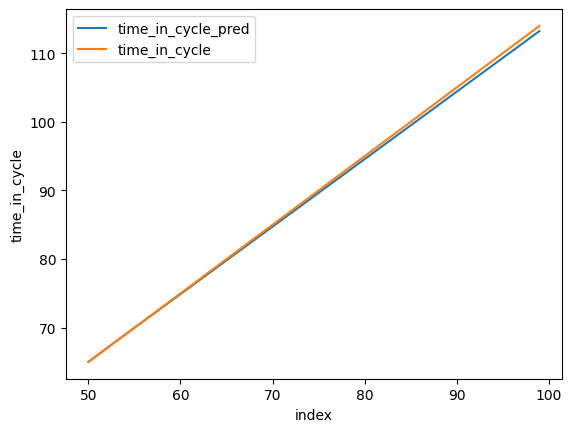

In [46]:
visualize_train_results(train_results_mlp)

#### VALIDATION PREDICTION RESULTS OF MLP MODEL

In [47]:
valid_results_mlp = get_predictions_df_valid(model_mlp, X_valid, y_valid)
valid_results_mlp

430/430 [==============================] - 0s 884us/step


,machine_id,time_in_cycle_pred,time_in_cycle
40014,193,112.259621,113
40015,193,113.242867,114
40016,193,114.226143,115
40017,193,115.209396,116
40018,193,116.192642,117
...,...,...,...
53754,260,304.189148,312
53755,260,305.151337,313
53756,260,306.113586,314
53757,260,307.075867,315


#### VISUALIZE VALIDATION PREDICTION RESULTS OF MLP MODEL

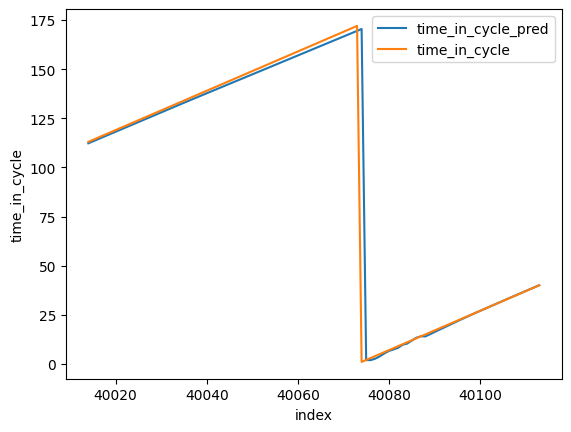

In [48]:
visualize_val_results(valid_results_mlp)

#### GET RUL IN df_train OF MLP MODEL

In [49]:
rul_train_valid_mlp = get_rul_train_valid_df(df=df_train, model=model_mlp, X_value_train=X_train, X_value_valid=X_valid, y_value_train=y_train, y_value_valid=y_valid)
rul_train_valid_mlp

430/430 [==============================] - 0s 871us/step


,machine_id,time_in_cycle_pred_x,time_in_cycle,max_time_cycle_actual,max_time_cycle_pred,RUL_pred,RUL_actual,operational_setting_1,operational_setting_2,operational_setting_3,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,14,15,149,148,134,134,10.0038,0.2513,100.0,...,372.03,2388.14,8118.56,8.6079,0.03,369.0,2319.0,100.00,28.54,17.1272
1,1,15,16,149,148,133,133,35.0053,0.8419,100.0,...,182.78,2387.76,8053.94,9.3232,0.02,332.0,2223.0,100.00,14.96,8.9446
2,1,16,17,149,148,132,132,25.0077,0.6217,60.0,...,164.53,2028.03,7857.51,10.8616,0.02,307.0,1915.0,84.93,14.07,8.5935
3,1,17,18,149,148,131,131,34.9996,0.8404,100.0,...,182.72,2387.72,8052.73,9.3419,0.02,334.0,2223.0,100.00,14.99,8.9676
4,1,18,19,149,148,130,130,42.0018,0.8400,100.0,...,130.42,2387.63,8070.70,9.3798,0.02,332.0,2212.0,100.00,10.49,6.4195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53740,260,304,312,316,308,4,4,20.0037,0.7000,100.0,...,314.05,2389.02,8169.64,9.3035,0.03,369.0,2324.0,100.00,24.36,14.5189
53741,260,305,313,316,308,3,3,10.0022,0.2510,100.0,...,371.22,2388.42,8245.36,8.7586,0.03,374.0,2319.0,100.00,28.10,16.9454
53742,260,306,314,316,308,2,2,25.0041,0.6200,60.0,...,163.74,2030.33,7971.25,11.0657,0.02,310.0,1915.0,84.93,14.19,8.5503
53743,260,307,315,316,308,1,1,25.0033,0.6220,60.0,...,164.37,2030.35,7972.47,11.0537,0.02,311.0,1915.0,84.93,14.05,8.3729


#### TRAIN VALID PREDICTION RESULTS WITH IMPORTANT FEATURES IN MLP MODEL

In [50]:
rul_train_valid_mlp.rename(columns={'time_in_cycle_pred_x': "time_in_cycle_pred"}, inplace=True)
features_imp_train_valid_mlp = get_important_features(rul_train_valid_mlp)
features_imp_train_valid_mlp

,machine_id,time_in_cycle,time_in_cycle_pred,max_time_cycle_actual,max_time_cycle_pred,RUL_actual,RUL_pred
0,1,15,14,149,148,134,134
1,1,16,15,149,148,133,133
2,1,17,16,149,148,132,132
3,1,18,17,149,148,131,131
4,1,19,18,149,148,130,130
...,...,...,...,...,...,...,...
53740,260,312,304,316,308,4,4
53741,260,313,305,316,308,3,3
53742,260,314,306,316,308,2,2
53743,260,315,307,316,308,1,1


#### TEST PREDICTION RESULTS OF TEST DATA IN MLP MODEL

In [51]:
test_results_mlp = get_predictions_df_test(model_mlp, X_test, y_test)
test_results_mlp

1062/1062 [==============================] - 1s 860us/step


,machine_id,time_in_cycle_pred,time_in_cycle
14,1,13.976228,15
15,1,15.075814,16
16,1,16.195488,17
17,1,17.315159,18
18,1,18.406219,19
...,...,...,...
33986,259,118.159149,119
33987,259,119.142403,120
33988,259,120.125656,121
33989,259,121.108917,122


#### GET RUL (REMAINING USEFUL LIFE) IN df_test OF MLP MODEL

In [52]:
test_preds_mlp = get_predictions(model=model_mlp, X_value=X_test)
rul_test_mlp = get_rul_test(df=df_test, test_preds_model=test_preds_mlp)
rul_test_mlp.drop(columns=['operational_setting_1_y',
       'operational_setting_2_y', 'operational_setting_3_y',
       'sensor_measurement_1_y', 'sensor_measurement_2_y',
       'sensor_measurement_3_y', 'sensor_measurement_4_y',
       'sensor_measurement_5_y', 'sensor_measurement_6_y',
       'sensor_measurement_7_y', 'sensor_measurement_8_y',
       'sensor_measurement_9_y', 'sensor_measurement_10_y',
       'sensor_measurement_11_y', 'sensor_measurement_12_y',
       'sensor_measurement_13_y', 'sensor_measurement_14_y',
       'sensor_measurement_15_y', 'sensor_measurement_16_y',
       'sensor_measurement_17_y', 'sensor_measurement_18_y',
       'sensor_measurement_19_y', 'sensor_measurement_20_y',
       'sensor_measurement_21_y',], inplace=True)
rul_test_mlp

1062/1062 [==============================] - 1s 845us/step


,index,machine_id,time_in_cycle,operational_setting_1_x,operational_setting_2_x,operational_setting_3_x,sensor_measurement_1_x,sensor_measurement_2_x,sensor_measurement_3_x,sensor_measurement_4_x,...,sensor_measurement_17_x,sensor_measurement_18_x,sensor_measurement_19_x,sensor_measurement_20_x,sensor_measurement_21_x,max_time_cycle_actual,time_in_cycle_pred,max_time_cycle_pred,RUL_pred,RUL_actual
0,14,1,15,0.0028,0.0000,100.0,518.67,642.68,1588.08,1405.52,...,391.0,2388.0,100.00,38.92,23.3790,258,14,252,238,243
1,15,1,16,25.0039,0.6201,60.0,462.54,536.85,1255.39,1045.72,...,308.0,1915.0,84.93,14.30,8.6670,258,15,252,237,242
2,16,1,17,25.0046,0.6200,60.0,462.54,536.43,1263.53,1052.85,...,306.0,1915.0,84.93,14.44,8.6406,258,16,252,236,241
3,17,1,18,20.0066,0.7000,100.0,491.19,607.55,1484.77,1254.02,...,365.0,2324.0,100.00,24.33,14.6571,258,17,252,235,240
4,18,1,19,42.0018,0.8408,100.0,445.00,549.74,1349.26,1128.53,...,330.0,2212.0,100.00,10.55,6.3165,258,18,252,234,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33972,33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,...,334.0,2223.0,100.00,14.94,8.9065,123,118,122,4,4
33973,33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,...,332.0,2212.0,100.00,10.57,6.4075,123,119,122,3,3
33974,33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,...,331.0,2212.0,100.00,10.57,6.4805,123,120,122,2,2
33975,33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,...,393.0,2388.0,100.00,39.08,23.3589,123,121,122,1,1


#### TEST PREDICTION RESULTS WITH IMPORTANT FEATURES IN MLP MODEL

In [53]:
features_imp_test_mlp = get_important_features(rul_test_mlp)
features_imp_test_mlp

,machine_id,time_in_cycle,time_in_cycle_pred,max_time_cycle_actual,max_time_cycle_pred,RUL_actual,RUL_pred
0,1,15,14,258,252,243,238
1,1,16,15,258,252,242,237
2,1,17,16,258,252,241,236
3,1,18,17,258,252,240,235
4,1,19,18,258,252,239,234
...,...,...,...,...,...,...,...
33972,259,119,118,123,122,4,4
33973,259,120,119,123,122,3,3
33974,259,121,120,123,122,2,2
33975,259,122,121,123,122,1,1


In [54]:
predictions = model_mlp.predict(X_train).flatten()
mse_loss = mse(y_train, predictions)
rmse_loss = np.sqrt(mse(y_train, predictions))
print(f"MSE: {mse_loss}")
print(f"RMSE: {rmse_loss}")

1250/1250 [==============================] - 1s 878us/step
MSE: 213.95956330278722
RMSE: 14.62735667517502


In [55]:
predictions = model_mlp.predict(X_valid).flatten()
mse_loss = mse(y_valid, predictions)
rmse_loss = np.sqrt(mse(y_valid, predictions))
print(f"MSE: {mse_loss}")
print(f"RMSE: {rmse_loss}")

430/430 [==============================] - 0s 839us/step
MSE: 204.33174311517539
RMSE: 14.294465471474455


#### TEST PREDICTION VISUALIZATION, MSE RESULT, AND RMSE RESULT

1062/1062 [==============================] - 1s 887us/step
MSE: 158.1815472540571
RMSE: 12.577024578733123


,time_in_cycle_pred,time_in_cycle
0,13.976228,15
1,15.075814,16
2,16.195488,17
3,17.315159,18
4,18.406219,19
...,...,...
33972,118.159149,119
33973,119.142403,120
33974,120.125656,121
33975,121.108917,122


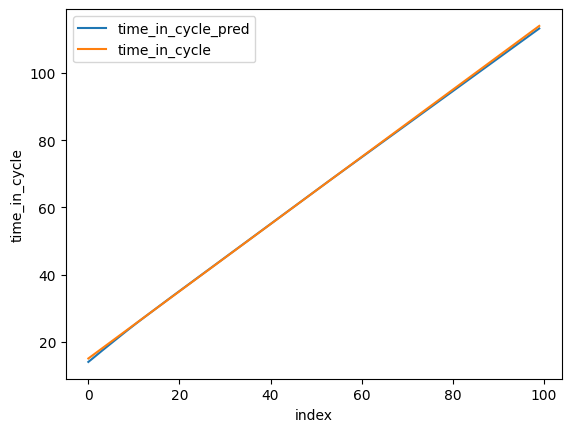

In [56]:
plot_predictions(model_mlp, X_test, y_test)

#### CNN MODEL BUILDING

In [26]:
model_cnn = Sequential()
model_cnn.add(InputLayer((14, 1)))
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(8, activation='relu'))
model_cnn.add(Dense(1, 'linear'))
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 3080      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,281
Trainable params: 3,281
Non-trainable params: 0
____________________________________________________

#### SAVE CNN MODEL CHECKPOINTS

In [43]:
cp3 = ModelCheckpoint('model5/', save_best_only=True)
model_cnn.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

#### TRAINING CNN MODEL

In [44]:
cnn_history = model_cnn.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, callbacks=[cp3])

Epoch 1/50
1230/1250 [============================>.] - ETA: 0s - loss: 1725.2012 - root_mean_squared_error: 41.5355

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1250/1250 [==============================] - 4s 3ms/step - loss: 1710.9962 - root_mean_squared_error: 41.3642 - val_loss: 673.2736 - val_root_mean_squared_error: 25.9475
Epoch 2/50
1237/1250 [============================>.] - ETA: 0s - loss: 642.2837 - root_mean_squared_error: 25.3433

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1250/1250 [==============================] - 3s 2ms/step - loss: 640.4493 - root_mean_squared_error: 25.3071 - val_loss: 555.0055 - val_root_mean_squared_error: 23.5586
Epoch 3/50
1240/1250 [============================>.] - ETA: 0s - loss: 547.0923 - root_mean_squared_error: 23.3900

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1250/1250 [==============================] - 3s 2ms/step - loss: 547.1476 - root_mean_squared_error: 23.3912 - val_loss: 487.1105 - val_root_mean_squared_error: 22.0706
Epoch 4/50
1232/1250 [============================>.] - ETA: 0s - loss: 485.5028 - root_mean_squared_error: 22.0341

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1250/1250 [==============================] - 3s 3ms/step - loss: 489.5891 - root_mean_squared_error: 22.1267 - val_loss: 456.5179 - val_root_mean_squared_error: 21.3663
Epoch 5/50
1220/1250 [============================>.] - ETA: 0s - loss: 462.9657 - root_mean_squared_error: 21.5166

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1250/1250 [==============================] - 3s 2ms/step - loss: 462.9059 - root_mean_squared_error: 21.5152 - val_loss: 431.8306 - val_root_mean_squared_error: 20.7805
Epoch 6/50
1215/1250 [============================>.] - ETA: 0s - loss: 450.1394 - root_mean_squared_error: 21.2165

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1250/1250 [==============================] - 3s 2ms/step - loss: 452.3535 - root_mean_squared_error: 21.2686 - val_loss: 429.3657 - val_root_mean_squared_error: 20.7211
Epoch 7/50
1228/1250 [============================>.] - ETA: 0s - loss: 445.2117 - root_mean_squared_error: 21.1000

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1250/1250 [==============================] - 3s 2ms/step - loss: 442.7720 - root_mean_squared_error: 21.0421 - val_loss: 418.0628 - val_root_mean_squared_error: 20.4466
Epoch 8/50
1250/1250 [==============================] - 2s 2ms/step - loss: 436.0498 - root_mean_squared_error: 20.8818 - val_loss: 429.1921 - val_root_mean_squared_error: 20.7170
Epoch 9/50
1249/1250 [============================>.] - ETA: 0s - loss: 433.7294 - root_mean_squared_error: 20.8262

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1250/1250 [==============================] - 3s 2ms/step - loss: 434.7949 - root_mean_squared_error: 20.8517 - val_loss: 411.0942 - val_root_mean_squared_error: 20.2755
Epoch 10/50
1250/1250 [==============================] - 2s 2ms/step - loss: 433.6211 - root_mean_squared_error: 20.8236 - val_loss: 434.5555 - val_root_mean_squared_error: 20.8460
Epoch 11/50
1250/1250 [==============================] - 2s 2ms/step - loss: 431.9741 - root_mean_squared_error: 20.7840 - val_loss: 425.0121 - val_root_mean_squared_error: 20.6158
Epoch 12/50
1229/1250 [============================>.] - ETA: 0s - loss: 431.4458 - root_mean_squared_error: 20.7713

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1250/1250 [==============================] - 3s 2ms/step - loss: 431.0537 - root_mean_squared_error: 20.7618 - val_loss: 406.6497 - val_root_mean_squared_error: 20.1656
Epoch 13/50
1250/1250 [==============================] - 2s 2ms/step - loss: 429.8418 - root_mean_squared_error: 20.7326 - val_loss: 408.2985 - val_root_mean_squared_error: 20.2064
Epoch 14/50
1235/1250 [============================>.] - ETA: 0s - loss: 431.1223 - root_mean_squared_error: 20.7635

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1250/1250 [==============================] - 3s 2ms/step - loss: 429.5482 - root_mean_squared_error: 20.7255 - val_loss: 405.4069 - val_root_mean_squared_error: 20.1347
Epoch 15/50
1217/1250 [============================>.] - ETA: 0s - loss: 423.5000 - root_mean_squared_error: 20.5791

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1250/1250 [==============================] - 3s 2ms/step - loss: 429.3975 - root_mean_squared_error: 20.7219 - val_loss: 404.6600 - val_root_mean_squared_error: 20.1162
Epoch 16/50
1231/1250 [============================>.] - ETA: 0s - loss: 427.3841 - root_mean_squared_error: 20.6733

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1250/1250 [==============================] - 3s 2ms/step - loss: 428.2186 - root_mean_squared_error: 20.6934 - val_loss: 403.8396 - val_root_mean_squared_error: 20.0958
Epoch 17/50
1250/1250 [==============================] - 2s 2ms/step - loss: 426.9453 - root_mean_squared_error: 20.6627 - val_loss: 410.4405 - val_root_mean_squared_error: 20.2593
Epoch 18/50
1250/1250 [==============================] - 2s 2ms/step - loss: 426.4651 - root_mean_squared_error: 20.6510 - val_loss: 421.9888 - val_root_mean_squared_error: 20.5424
Epoch 19/50
1243/1250 [============================>.] - ETA: 0s - loss: 423.9744 - root_mean_squared_error: 20.5906

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1250/1250 [==============================] - 3s 2ms/step - loss: 427.5042 - root_mean_squared_error: 20.6762 - val_loss: 402.8924 - val_root_mean_squared_error: 20.0722
Epoch 20/50
1250/1250 [==============================] - 2s 2ms/step - loss: 426.9096 - root_mean_squared_error: 20.6618 - val_loss: 403.2812 - val_root_mean_squared_error: 20.0819
Epoch 21/50
1250/1250 [==============================] - 2s 2ms/step - loss: 427.6878 - root_mean_squared_error: 20.6806 - val_loss: 405.5321 - val_root_mean_squared_error: 20.1378
Epoch 22/50
1250/1250 [==============================] - 2s 2ms/step - loss: 427.4134 - root_mean_squared_error: 20.6740 - val_loss: 406.4742 - val_root_mean_squared_error: 20.1612
Epoch 23/50
1250/1250 [==============================] - 2s 2ms/step - loss: 426.3199 - root_mean_squared_error: 20.6475 - val_loss: 404.0586 - val_root_mean_squared_error: 20.1012
Epoch 24/50
1250/1250 [==============================] - 3s 2ms/step - loss: 426.3021 - root_mean_squared_e

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1250/1250 [==============================] - 3s 2ms/step - loss: 424.9322 - root_mean_squared_error: 20.6139 - val_loss: 402.7980 - val_root_mean_squared_error: 20.0698
Epoch 34/50
1250/1250 [==============================] - 2s 2ms/step - loss: 425.1342 - root_mean_squared_error: 20.6188 - val_loss: 410.4695 - val_root_mean_squared_error: 20.2600
Epoch 35/50
1250/1250 [==============================] - 2s 2ms/step - loss: 424.7885 - root_mean_squared_error: 20.6104 - val_loss: 414.3266 - val_root_mean_squared_error: 20.3550
Epoch 36/50
1250/1250 [==============================] - 2s 2ms/step - loss: 423.9766 - root_mean_squared_error: 20.5907 - val_loss: 404.5529 - val_root_mean_squared_error: 20.1135
Epoch 37/50
1250/1250 [==============================] - 2s 2ms/step - loss: 424.7780 - root_mean_squared_error: 20.6101 - val_loss: 403.1495 - val_root_mean_squared_error: 20.0786
Epoch 38/50
1250/1250 [==============================] - 2s 2ms/step - loss: 425.1628 - root_mean_squared_e

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1250/1250 [==============================] - 3s 2ms/step - loss: 424.8262 - root_mean_squared_error: 20.6113 - val_loss: 402.3905 - val_root_mean_squared_error: 20.0597
Epoch 42/50
1250/1250 [==============================] - 2s 2ms/step - loss: 423.6513 - root_mean_squared_error: 20.5828 - val_loss: 408.4288 - val_root_mean_squared_error: 20.2096
Epoch 43/50
1250/1250 [==============================] - 2s 2ms/step - loss: 424.4720 - root_mean_squared_error: 20.6027 - val_loss: 405.7249 - val_root_mean_squared_error: 20.1426
Epoch 44/50
1250/1250 [==============================] - 2s 2ms/step - loss: 423.4499 - root_mean_squared_error: 20.5779 - val_loss: 402.8975 - val_root_mean_squared_error: 20.0723
Epoch 45/50
1250/1250 [==============================] - 2s 2ms/step - loss: 424.9683 - root_mean_squared_error: 20.6148 - val_loss: 405.3234 - val_root_mean_squared_error: 20.1326
Epoch 46/50
1250/1250 [==============================] - 2s 2ms/step - loss: 424.2383 - root_mean_squared_e

#### LOADING CNN MODEL

In [57]:
model_cnn = load_model('model5/')

#### TRAIN PREDICTION RESULTS OF CNN MODEL

In [58]:
train_results_cnn = get_predictions_df_train(model_cnn, X_train, y_train)
train_results_cnn

1250/1250 [==============================] - 1s 972us/step


,machine_id,time_in_cycle_pred,time_in_cycle
0,1,17.206100,15
1,1,18.174894,16
2,1,19.143080,17
3,1,20.110004,18
4,1,21.074987,19
...,...,...,...
39995,193,106.739883,108
39996,193,107.696053,109
39997,193,108.651421,110
39998,193,109.604973,111


#### VISUALIZE TRAIN PREDICTION RESULTS OF CNN MODEL

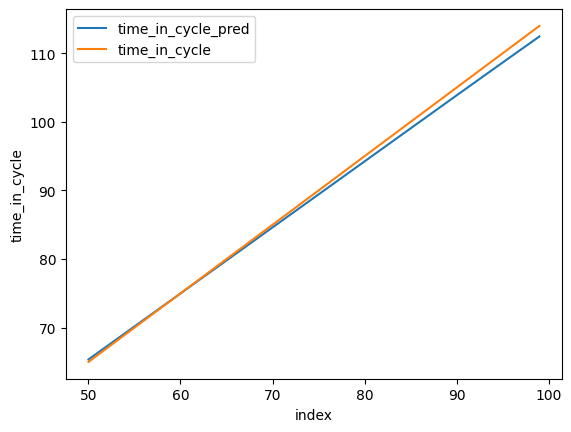

In [59]:
visualize_train_results(train_results_cnn)

#### VALIATION PREDICTION RESULTS OF CNN MODEL

In [60]:
valid_results_cnn = get_predictions_df_valid(model_cnn, X_valid, y_valid)
valid_results_cnn

430/430 [==============================] - 0s 1ms/step


,machine_id,time_in_cycle_pred,time_in_cycle
40014,193,111.508308,113
40015,193,112.458473,114
40016,193,113.407700,115
40017,193,114.356499,116
40018,193,115.305283,117
...,...,...,...
53754,260,300.319153,312
53755,260,301.267944,313
53756,260,302.216675,314
53757,260,303.165497,315


#### VISUALIZE VALIDATION PREDICTION RESULTS OF CNN MODEL

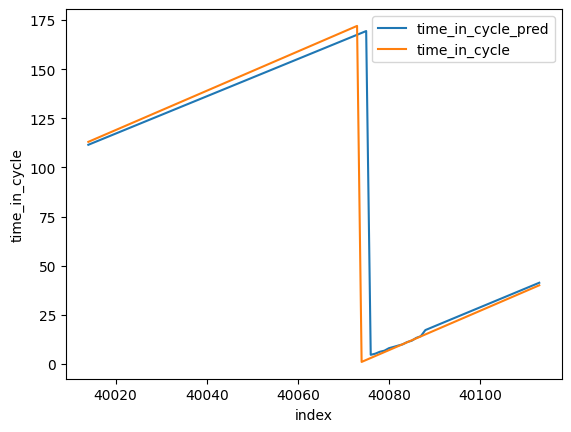

In [61]:
visualize_val_results(valid_results_cnn)

#### GET RUL IN df_train OF CNN MODEL

In [62]:
rul_train_valid_cnn = get_rul_train_valid_df(df=df_train,X_value_train=X_train, X_value_valid=X_valid, y_value_train=y_train, y_value_valid=y_valid, model=model_cnn)
rul_train_valid_cnn

430/430 [==============================] - 0s 931us/step


,machine_id,time_in_cycle_pred_x,time_in_cycle,max_time_cycle_actual,max_time_cycle_pred,RUL_pred,RUL_actual,operational_setting_1,operational_setting_2,operational_setting_3,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,17,15,149,148,131,134,10.0038,0.2513,100.0,...,372.03,2388.14,8118.56,8.6079,0.03,369.0,2319.0,100.00,28.54,17.1272
1,1,18,16,149,148,130,133,35.0053,0.8419,100.0,...,182.78,2387.76,8053.94,9.3232,0.02,332.0,2223.0,100.00,14.96,8.9446
2,1,19,17,149,148,129,132,25.0077,0.6217,60.0,...,164.53,2028.03,7857.51,10.8616,0.02,307.0,1915.0,84.93,14.07,8.5935
3,1,20,18,149,148,128,131,34.9996,0.8404,100.0,...,182.72,2387.72,8052.73,9.3419,0.02,334.0,2223.0,100.00,14.99,8.9676
4,1,21,19,149,148,127,130,42.0018,0.8400,100.0,...,130.42,2387.63,8070.70,9.3798,0.02,332.0,2212.0,100.00,10.49,6.4195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53740,260,300,312,316,304,4,4,20.0037,0.7000,100.0,...,314.05,2389.02,8169.64,9.3035,0.03,369.0,2324.0,100.00,24.36,14.5189
53741,260,301,313,316,304,3,3,10.0022,0.2510,100.0,...,371.22,2388.42,8245.36,8.7586,0.03,374.0,2319.0,100.00,28.10,16.9454
53742,260,302,314,316,304,2,2,25.0041,0.6200,60.0,...,163.74,2030.33,7971.25,11.0657,0.02,310.0,1915.0,84.93,14.19,8.5503
53743,260,303,315,316,304,1,1,25.0033,0.6220,60.0,...,164.37,2030.35,7972.47,11.0537,0.02,311.0,1915.0,84.93,14.05,8.3729


#### TRAIN VALID PREDICTION RESULTS WITH IMPORTANT FEATURES IN CNN MODEL

In [63]:
rul_train_valid_cnn.rename(columns={'time_in_cycle_pred_x': "time_in_cycle_pred"}, inplace=True)
features_imp_train_valid_cnn = get_important_features(rul_train_valid_cnn)
features_imp_train_valid_cnn

,machine_id,time_in_cycle,time_in_cycle_pred,max_time_cycle_actual,max_time_cycle_pred,RUL_actual,RUL_pred
0,1,15,17,149,148,134,131
1,1,16,18,149,148,133,130
2,1,17,19,149,148,132,129
3,1,18,20,149,148,131,128
4,1,19,21,149,148,130,127
...,...,...,...,...,...,...,...
53740,260,312,300,316,304,4,4
53741,260,313,301,316,304,3,3
53742,260,314,302,316,304,2,2
53743,260,315,303,316,304,1,1


#### TEST PREDICTION RESULTS OF TEST DATA IN CNN MODEL

In [64]:
test_results_cnn = get_predictions_df_test(model_cnn, X_test, y_test)
test_results_cnn

1062/1062 [==============================] - 1s 977us/step


,machine_id,time_in_cycle_pred,time_in_cycle
14,1,17.206100,15
15,1,18.174894,16
16,1,19.143080,17
17,1,20.110004,18
18,1,21.074987,19
...,...,...,...
33986,259,117.202858,119
33987,259,118.151649,120
33988,259,119.100433,121
33989,259,120.049217,122


#### GET RUL (REMAINING USEFUL LIFE) IN df_test OF CNN MODEL

In [65]:
test_preds_cnn = get_predictions(model=model_cnn, X_value=X_test)
rul_test_cnn = get_rul_test(df=df_test, test_preds_model=test_preds_cnn)
rul_test_cnn.drop(columns=['operational_setting_1_y',
       'operational_setting_2_y', 'operational_setting_3_y',
       'sensor_measurement_1_y', 'sensor_measurement_2_y',
       'sensor_measurement_3_y', 'sensor_measurement_4_y',
       'sensor_measurement_5_y', 'sensor_measurement_6_y',
       'sensor_measurement_7_y', 'sensor_measurement_8_y',
       'sensor_measurement_9_y', 'sensor_measurement_10_y',
       'sensor_measurement_11_y', 'sensor_measurement_12_y',
       'sensor_measurement_13_y', 'sensor_measurement_14_y',
       'sensor_measurement_15_y', 'sensor_measurement_16_y',
       'sensor_measurement_17_y', 'sensor_measurement_18_y',
       'sensor_measurement_19_y', 'sensor_measurement_20_y',
       'sensor_measurement_21_y',], inplace=True)
rul_test_cnn

1062/1062 [==============================] - 1s 989us/step


,index,machine_id,time_in_cycle,operational_setting_1_x,operational_setting_2_x,operational_setting_3_x,sensor_measurement_1_x,sensor_measurement_2_x,sensor_measurement_3_x,sensor_measurement_4_x,...,sensor_measurement_17_x,sensor_measurement_18_x,sensor_measurement_19_x,sensor_measurement_20_x,sensor_measurement_21_x,max_time_cycle_actual,time_in_cycle_pred,max_time_cycle_pred,RUL_pred,RUL_actual
0,14,1,15,0.0028,0.0000,100.0,518.67,642.68,1588.08,1405.52,...,391.0,2388.0,100.00,38.92,23.3790,258,17,249,232,243
1,15,1,16,25.0039,0.6201,60.0,462.54,536.85,1255.39,1045.72,...,308.0,1915.0,84.93,14.30,8.6670,258,18,249,231,242
2,16,1,17,25.0046,0.6200,60.0,462.54,536.43,1263.53,1052.85,...,306.0,1915.0,84.93,14.44,8.6406,258,19,249,230,241
3,17,1,18,20.0066,0.7000,100.0,491.19,607.55,1484.77,1254.02,...,365.0,2324.0,100.00,24.33,14.6571,258,20,249,229,240
4,18,1,19,42.0018,0.8408,100.0,445.00,549.74,1349.26,1128.53,...,330.0,2212.0,100.00,10.55,6.3165,258,21,249,228,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33972,33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,...,334.0,2223.0,100.00,14.94,8.9065,123,117,121,4,4
33973,33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,...,332.0,2212.0,100.00,10.57,6.4075,123,118,121,3,3
33974,33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,...,331.0,2212.0,100.00,10.57,6.4805,123,119,121,2,2
33975,33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,...,393.0,2388.0,100.00,39.08,23.3589,123,120,121,1,1


#### TEST PREDICTION RESULST WITH IMPORTANT FEATURES IN CNN MODEL

In [66]:
features_imp_test_cnn = get_important_features(rul_test_cnn)
features_imp_test_cnn

,machine_id,time_in_cycle,time_in_cycle_pred,max_time_cycle_actual,max_time_cycle_pred,RUL_actual,RUL_pred
0,1,15,17,258,249,243,232
1,1,16,18,258,249,242,231
2,1,17,19,258,249,241,230
3,1,18,20,258,249,240,229
4,1,19,21,258,249,239,228
...,...,...,...,...,...,...,...
33972,259,119,117,123,121,4,4
33973,259,120,118,123,121,3,3
33974,259,121,119,123,121,2,2
33975,259,122,120,123,121,1,1


In [67]:
predictions = model_cnn.predict(X_valid).flatten()
mse_loss = mse(y_valid, predictions)
rmse_loss = np.sqrt(mse(y_valid, predictions))
print(f"MSE: {mse_loss}")
print(f"RMSE: {rmse_loss}")

430/430 [==============================] - 0s 1ms/step
MSE: 402.3906623479685
RMSE: 20.059677523528848


In [68]:
predictions = model_cnn.predict(X_train).flatten()
mse_loss = mse(y_train, predictions)
rmse_loss = np.sqrt(mse(y_train, predictions))
print(f"MSE: {mse_loss}")
print(f"RMSE: {rmse_loss}")

1250/1250 [==============================] - 1s 982us/step
MSE: 421.2458676750389
RMSE: 20.52427508281447


#### TEST PREDICTION VISUALIZATION, MSE RESULT, AND RMSE RESULT

1062/1062 [==============================] - 1s 957us/step
MSE: 312.27295320452583
RMSE: 17.671246509641755


,time_in_cycle_pred,time_in_cycle
0,17.206100,15
1,18.174894,16
2,19.143080,17
3,20.110004,18
4,21.074987,19
...,...,...
33972,117.202858,119
33973,118.151649,120
33974,119.100433,121
33975,120.049217,122


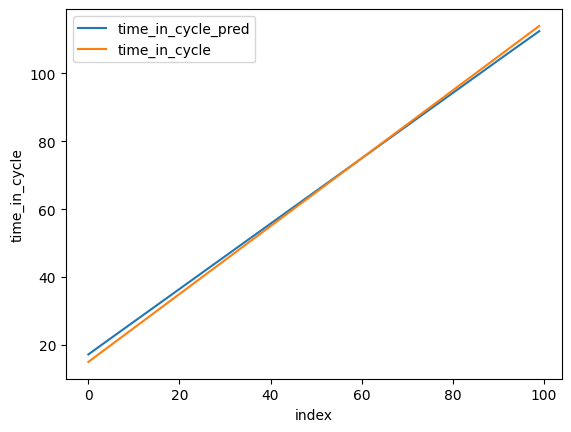

In [69]:
plot_predictions(model_cnn, X_test, y_test)

#### Conclusion: We should use one of these models above, but MLP is the best model with RMSE is about 12.58, and the next position is LSTM with RMSE is approximately 12.60, and the last model is CNN with RMSE is nearly 17.66

#### FIND THRESHOLD VALUE WHERE MACHINES ARE LIKELY TO FAIL. WE HAVE ALREADY FOUND OUT RUL PREDICTIONS, SO THRESHOLD VALUE WHERE MACHINES ARE LIKELY TO FAIL MEANS THAT ITS THRESHOLD IS THE MAXIMUM VALUE IN RUL PREDTIONS IN EACH MACHINES 

In [85]:
grouped_machine_id = rul_train_valid_lstm.groupby(by='machine_id')
max_RUL_pred = grouped_machine_id['RUL_pred'].max()
merged_RUL_pred = rul_train_valid_lstm.merge(max_RUL_pred.to_frame(name='max_RUL_thresh_pred'), left_on='machine_id',right_index=True)

max_RUL_acutal = grouped_machine_id['RUL_actual'].max()
merged_RUL_actual = rul_train_valid_lstm.merge(max_RUL_acutal.to_frame(name='max_RUL_thresh_actual'), left_on='machine_id',right_index=True)
all_merged_train_lstm = merged_RUL_pred.merge(merged_RUL_actual, left_on=["machine_id", 'time_in_cycle'], right_on=['machine_id', 'time_in_cycle'])
# all_merged_train_lstm

In [86]:
from sklearn.metrics import classification_report

results_train_valid_lstm = pd.DataFrame({'machine_id': all_merged_train_lstm['machine_id'], 
                            'max_RUL_thresh_pred': all_merged_train_lstm['max_RUL_thresh_pred'], 
                            'max_RUL_thresh_actual': all_merged_train_lstm['max_RUL_thresh_actual'],
                            'RUL_pred': all_merged_train_lstm['RUL_pred_x'], 'RUL': all_merged_train_lstm['RUL_actual_x'], })
results_train_valid_lstm


,machine_id,max_RUL_thresh_pred,max_RUL_thresh_actual,RUL_pred,RUL
0,1,147,148,134,134
1,1,147,148,133,133
2,1,147,148,132,132
3,1,147,148,131,131
4,1,147,148,130,130
...,...,...,...,...,...
53740,260,308,315,5,4
53741,260,308,315,4,3
53742,260,308,315,3,2
53743,260,308,315,2,1


#### THE ABOVE TABLE IS THE THRESHOLD VALUE OF EVERY MACHINE IN max_RUL_thresh COLUMN IN TRAIN DATA IN LSTM MODEL

In [88]:
grouped_machine_id = features_imp_test_lstm.groupby(by='machine_id')
max_RUL_pred = grouped_machine_id['RUL_pred'].max()
merged_RUL_pred = features_imp_test_lstm.merge(max_RUL_pred.to_frame(name='max_RUL_thresh_pred'), left_on='machine_id',right_index=True)

max_RUL_acutal = grouped_machine_id['RUL_actual'].max()
merged_RUL_actual = features_imp_test_lstm.merge(max_RUL_acutal.to_frame(name='max_RUL_thresh_actual'), left_on='machine_id',right_index=True)
all_merged_test = merged_RUL_pred.merge(merged_RUL_actual, left_on=["machine_id", 'time_in_cycle'], right_on=['machine_id', 'time_in_cycle'])
# all_merged_test

In [89]:
results_test_lstm = pd.DataFrame({'machine_id': all_merged_test['machine_id'], 
                            'max_RUL_thresh_pred': all_merged_test['max_RUL_thresh_pred'], 
                            'max_RUL_thresh_actual': all_merged_test['max_RUL_thresh_actual'],
                            'RUL_pred': all_merged_test['RUL_pred_x'], 'RUL': all_merged_test['RUL_actual_x'], })
results_test_lstm

,machine_id,max_RUL_thresh_pred,max_RUL_thresh_actual,RUL_pred,RUL
0,1,238,243,238,243
1,1,238,243,237,242
2,1,238,243,236,241
3,1,238,243,235,240
4,1,238,243,234,239
...,...,...,...,...,...
33972,259,125,122,4,4
33973,259,125,122,3,3
33974,259,125,122,2,2
33975,259,125,122,1,1


#### THE ABOVE TABLE IS THE THRESHOLD VALUE OF EVERY MACHINE IN max_RUL_thresh COLUMN IN TEST DATA IN LSTM MODEL

In [91]:
grouped_machine_id = rul_train_valid_mlp.groupby(by='machine_id')
max_RUL_pred = grouped_machine_id['RUL_pred'].max()
merged_RUL_pred = rul_train_valid_mlp.merge(max_RUL_pred.to_frame(name='max_RUL_thresh_pred'), left_on='machine_id',right_index=True)

max_RUL_acutal = grouped_machine_id['RUL_actual'].max()
merged_RUL_actual = rul_train_valid_mlp.merge(max_RUL_acutal.to_frame(name='max_RUL_thresh_actual'), left_on='machine_id',right_index=True)
all_merged_train_valid_mlp = merged_RUL_pred.merge(merged_RUL_actual, left_on=["machine_id", 'time_in_cycle'], right_on=['machine_id', 'time_in_cycle'])
# all_merged

In [92]:
results_train_valid_mlp = pd.DataFrame({'machine_id': all_merged_train_valid_mlp['machine_id'], 
                            'max_RUL_thresh_pred': all_merged_train_valid_mlp['max_RUL_thresh_pred'], 
                            'max_RUL_thresh_actual': all_merged_train_valid_mlp['max_RUL_thresh_actual'],
                            'RUL_pred': all_merged_train_valid_mlp['RUL_pred_x'], 'RUL': all_merged_train_valid_mlp['RUL_actual_x'], })
results_train_valid_mlp

,machine_id,max_RUL_thresh_pred,max_RUL_thresh_actual,RUL_pred,RUL
0,1,146,148,134,134
1,1,146,148,133,133
2,1,146,148,132,132
3,1,146,148,131,131
4,1,146,148,130,130
...,...,...,...,...,...
53740,260,307,315,4,4
53741,260,307,315,3,3
53742,260,307,315,2,2
53743,260,307,315,1,1


#### THE ABOVE TABLE IS THE THRESHOLD VALUE OF EVERY MACHINE IN max_RUL_thresh COLUMN IN TRAIN DATA IN MLP MODEL

In [94]:
grouped_machine_id = features_imp_test_mlp.groupby(by='machine_id')
max_RUL_pred = grouped_machine_id['RUL_pred'].max()
merged_RUL_pred = features_imp_test_mlp.merge(max_RUL_pred.to_frame(name='max_RUL_thresh_pred'), left_on='machine_id',right_index=True)

max_RUL_acutal = grouped_machine_id['RUL_actual'].max()
merged_RUL_actual = features_imp_test_mlp.merge(max_RUL_acutal.to_frame(name='max_RUL_thresh_actual'), left_on='machine_id',right_index=True)
all_merged_test_mlp = merged_RUL_pred.merge(merged_RUL_actual, left_on=["machine_id", 'time_in_cycle'], right_on=['machine_id', 'time_in_cycle'])
# all_merged_test

In [95]:
results_test_mlp = pd.DataFrame({'machine_id': all_merged_test_mlp['machine_id'], 
                            'max_RUL_thresh_pred': all_merged_test_mlp['max_RUL_thresh_pred'], 
                            'max_RUL_thresh_actual': all_merged_test_mlp['max_RUL_thresh_actual'],
                            'RUL_pred': all_merged_test_mlp['RUL_pred_x'], 'RUL': all_merged_test_mlp['RUL_actual_x'], })
results_test_mlp

,machine_id,max_RUL_thresh_pred,max_RUL_thresh_actual,RUL_pred,RUL
0,1,238,243,238,243
1,1,238,243,237,242
2,1,238,243,236,241
3,1,238,243,235,240
4,1,238,243,234,239
...,...,...,...,...,...
33972,259,119,122,4,4
33973,259,119,122,3,3
33974,259,119,122,2,2
33975,259,119,122,1,1


#### THE ABOVE TABLE IS THE THRESHOLD VALUE OF EVERY MACHINE IN max_RUL_thresh COLUMN IN TEST DATA IN MLP MODEL

In [97]:
grouped_machine_id = rul_train_valid_cnn.groupby(by='machine_id')
max_RUL_pred = grouped_machine_id['RUL_pred'].max()
merged_RUL_pred = rul_train_valid_cnn.merge(max_RUL_pred.to_frame(name='max_RUL_thresh_pred'), left_on='machine_id',right_index=True)

max_RUL_acutal = grouped_machine_id['RUL_actual'].max()
merged_RUL_actual = rul_train_valid_cnn.merge(max_RUL_acutal.to_frame(name='max_RUL_thresh_actual'), left_on='machine_id',right_index=True)
all_merged_train_valid_cnn = merged_RUL_pred.merge(merged_RUL_actual, left_on=["machine_id", 'time_in_cycle'], right_on=['machine_id', 'time_in_cycle'])
# all_merged

In [98]:
results_train_cnn = pd.DataFrame({'machine_id': all_merged_train_valid_cnn['machine_id'], 
                            'max_RUL_thresh_pred': all_merged_train_valid_cnn['max_RUL_thresh_pred'], 
                            'max_RUL_thresh_actual': all_merged_train_valid_cnn['max_RUL_thresh_actual'],
                            'RUL_pred': all_merged_train_valid_cnn['RUL_pred_x'], 'RUL': all_merged_train_valid_cnn['RUL_actual_x'], })
results_train_cnn

,machine_id,max_RUL_thresh_pred,max_RUL_thresh_actual,RUL_pred,RUL
0,1,143,148,131,134
1,1,143,148,130,133
2,1,143,148,129,132
3,1,143,148,128,131
4,1,143,148,127,130
...,...,...,...,...,...
53740,260,300,315,4,4
53741,260,300,315,3,3
53742,260,300,315,2,2
53743,260,300,315,1,1


#### THE ABOVE TABLE IS THE THRESHOLD VALUE OF EVERY MACHINE IN max_RUL_thresh COLUMN IN TRAIN DATA IN CNN MODEL

In [100]:
grouped_machine_id = features_imp_test_cnn.groupby(by='machine_id')
max_RUL_pred = grouped_machine_id['RUL_pred'].max()
merged_RUL_pred = features_imp_test_cnn.merge(max_RUL_pred.to_frame(name='max_RUL_thresh_pred'), left_on='machine_id',right_index=True)

max_RUL_acutal = grouped_machine_id['RUL_actual'].max()
merged_RUL_actual = features_imp_test_cnn.merge(max_RUL_acutal.to_frame(name='max_RUL_thresh_actual'), left_on='machine_id',right_index=True)
all_merged_test_cnn = merged_RUL_pred.merge(merged_RUL_actual, left_on=["machine_id", 'time_in_cycle'], right_on=['machine_id', 'time_in_cycle'])
# all_merged_test

In [101]:
results_test_cnn = pd.DataFrame({'machine_id': all_merged_test_cnn['machine_id'], 
                            'max_RUL_thresh_pred': all_merged_test_cnn['max_RUL_thresh_pred'], 
                            'max_RUL_thresh_actual': all_merged_test_cnn['max_RUL_thresh_actual'],
                            'RUL_pred': all_merged_test_cnn['RUL_pred_x'], 'RUL': all_merged_test_cnn['RUL_actual_x'], })
results_test_cnn

,machine_id,max_RUL_thresh_pred,max_RUL_thresh_actual,RUL_pred,RUL
0,1,232,243,232,243
1,1,232,243,231,242
2,1,232,243,230,241
3,1,232,243,229,240
4,1,232,243,228,239
...,...,...,...,...,...
33972,259,116,122,4,4
33973,259,116,122,3,3
33974,259,116,122,2,2
33975,259,116,122,1,1


#### THE ABOVE TABLE IS THE THRESHOLD VALUE OF EVERY MACHINE IN max_RUL_thresh COLUMN IN TEST DATA IN CNN MODEL